In [1]:
#main
import pandas as pd
import numpy as np
import math
import sklearn
import re

#graphic
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
def dtype_convert_accident(df):
    to_convert_accident = ['accident_index', 'accident_year', 'accident_reference',
       'police_force', 'accident_severity', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location', 'month']
    
    df[to_convert_accident] = df[to_convert_accident].astype(object)
    
    return df

In [4]:
def dtype_convert_vehicle(df):
    to_convert_vehicle = ['accident_index', 'accident_year', 'accident_reference',
       'vehicle_reference', 'vehicle_type', 'towing_and_articulation',
       'vehicle_manoeuvre', 'vehicle_direction_from', 'vehicle_direction_to',
       'vehicle_location_restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       'first_point_of_impact', 'vehicle_left_hand_drive',
       'journey_purpose_of_driver', 'sex_of_driver',
       'age_band_of_driver', 'propulsion_code','generic_make_model', 'driver_imd_decile',
       'driver_home_area_type']
    
    df[to_convert_vehicle] = df[to_convert_vehicle].astype(object)
    
    return df

In [5]:
def dtype_convert_casualty(df):
    to_convert_casualty = ['accident_index', 'accident_year', 'accident_reference',
                       'vehicle_reference', 'casualty_reference', 'casualty_class', 'sex_of_casualty',
                       'age_band_of_casualty','casualty_severity', 'pedestrian_location', 'pedestrian_movement',
                       'car_passenger', 'bus_or_coach_passenger',
                       'pedestrian_road_maintenance_worker', 'casualty_type','casualty_home_area_type', 'casualty_imd_decile']  

    
    df[to_convert_casualty] = df[to_convert_casualty].astype(object)
    
    return df

# Reading the clean data from the csv files

In [6]:
accident_df = pd.read_csv('accident_clean.csv')
vehicle_df = pd.read_csv('vehicle_clean.csv')
casualty_df = pd.read_csv('casualty_clean.csv')

/var/folders/33/p_3l01b14g96rn22vzwly2g00000gn/T/ipykernel_19697/2068054436.py:1: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  accident_df = pd.read_csv('accident_clean.csv')
/var/folders/33/p_3l01b14g96rn22vzwly2g00000gn/T/ipykernel_19697/2068054436.py:2: DtypeWarning: Columns (4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  vehicle_df = pd.read_csv('vehicle_clean.csv')
/var/folders/33/p_3l01b14g96rn22vzwly2g00000gn/T/ipykernel_19697/2068054436.py:3: DtypeWarning: Columns (2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  casualty_df = pd.read_csv('casualty_clean.csv')


In [7]:
dtype_convert_accident(accident_df)
dtype_convert_vehicle(vehicle_df)
dtype_convert_casualty(casualty_df)
display(accident_df.dtypes)
display(vehicle_df.dtypes)
display(casualty_df.dtypes)

Unnamed: 0                                       int64
accident_index                                  object
accident_year                                   object
accident_reference                              object
location_easting_osgr                            int64
location_northing_osgr                         float64
longitude                                      float64
latitude                                       float64
police_force                                    object
accident_severity                               object
number_of_vehicles                               int64
number_of_casualties                             int64
date                                            object
day_of_week                                     object
time                                            object
local_authority_district                        object
local_authority_ons_district                    object
local_authority_highway                         object
first_road

Unnamed: 0                           int64
age_of_driver                        int64
engine_capacity_cc                   int64
age_of_vehicle                       int64
accident_index                      object
accident_year                       object
accident_reference                  object
vehicle_reference                   object
vehicle_type                        object
towing_and_articulation             object
vehicle_manoeuvre                   object
vehicle_direction_from              object
vehicle_direction_to                object
vehicle_location_restricted_lane    object
junction_location                   object
skidding_and_overturning            object
hit_object_in_carriageway           object
vehicle_leaving_carriageway         object
hit_object_off_carriageway          object
first_point_of_impact               object
vehicle_left_hand_drive             object
journey_purpose_of_driver           object
sex_of_driver                       object
age_band_of

Unnamed: 0                             int64
age_of_casualty                        int64
accident_index                        object
accident_year                         object
accident_reference                    object
vehicle_reference                     object
casualty_reference                    object
casualty_class                        object
sex_of_casualty                       object
age_band_of_casualty                  object
casualty_severity                     object
pedestrian_location                   object
pedestrian_movement                   object
car_passenger                         object
bus_or_coach_passenger                object
pedestrian_road_maintenance_worker    object
casualty_type                         object
casualty_home_area_type               object
casualty_imd_decile                   object
dtype: object

In [8]:
accident_df = accident_df.drop(['Unnamed: 0'], axis=1)
vehicle_df = vehicle_df.drop(['Unnamed: 0'], axis=1)
casualty_df = casualty_df.drop(['Unnamed: 0'], axis=1)

In [9]:
display(accident_df.tail())
display(vehicle_df.tail())
display(casualty_df.tail())

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,month
597835,2020991027064,2020,991027064,343034,731654.0,-2.926320,56.473539,99,2,2,1,2020-12-08,4,14:30,918.0,S12000042,S12000042,4,959,6.0,30.0,1.0,4.0,4.0,959.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01032739,12
597836,2020991029573,2020,991029573,257963,658891.0,-4.267565,55.802353,99,3,1,1,2020-11-13,6,15:05,922.0,S12000011,S12000011,6,0,6.0,30.0,3.0,4.0,6.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,2.0,E01032739,11
597837,2020991030297,2020,991030297,383664,810646.0,-2.271903,57.186317,99,2,2,1,2020-04-15,4,12:42,910.0,S12000033,S12000033,4,979,6.0,60.0,8.0,4.0,6.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,2.0,E01032739,4
597838,2020991030900,2020,991030900,277161,674852.0,-3.968753,55.950940,99,3,2,1,2020-12-15,3,14:00,932.0,S12000044,S12000044,6,0,6.0,30.0,3.0,4.0,6.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0,2.0,E01032739,12
597839,2020991032575,2020,991032575,240402,681950.0,-4.561040,56.003843,99,3,1,1,2020-08-25,3,13:50,916.0,S12000039,S12000039,6,0,6.0,30.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,1.0,1.0,2.0,E01032739,8


,age_of_driver,engine_capacity_cc,age_of_vehicle,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_band_of_driver,propulsion_code,generic_make_model,driver_imd_decile,driver_home_area_type
1101586,57,1968,2,2020991030297,2020,991030297,1,9.0,0.0,7.0,8.0,2.0,0.0,6.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,1.0,9.0,1.0,AUDI A5,7.0,1.0
1101587,38,1301,2,2020991030297,2020,991030297,2,5.0,0.0,16.0,6.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,1.0,7.0,1.0,KTM 1290 SUPERDUKE,9.0,2.0
1101588,68,1995,1,2020991030900,2020,991030900,1,9.0,0.0,7.0,8.0,2.0,0.0,6.0,0.0,0.0,0.0,0.0,3.0,1.0,5.0,2.0,10.0,1.0,BMW X3,5.0,1.0
1101589,76,1856,7,2020991030900,2020,991030900,2,1.0,0.0,18.0,6.0,2.0,4.0,8.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,1.0,11.0,1.0,Other,9.0,1.0
1101590,39,999,2,2020991032575,2020,991032575,1,9.0,0.0,1.0,8.0,4.0,0.0,0.0,0.0,12.0,0.0,0.0,2.0,1.0,5.0,1.0,7.0,1.0,FORD FOCUS,7.0,1.0


,age_of_casualty,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
781711,11,2020991027064,2020,991027064,2,1,1,1.0,3.0,2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
781712,63,2020991029573,2020,991029573,1,1,3,2.0,9.0,3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,10.0
781713,38,2020991030297,2020,991030297,2,1,1,1.0,7.0,2,0.0,0.0,0.0,0.0,0.0,5.0,2.0,9.0
781714,76,2020991030900,2020,991030900,2,1,1,1.0,11.0,3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,9.0
781715,48,2020991032575,2020,991032575,1,1,3,1.0,8.0,3,9.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [10]:
display(accident_df.shape)
display(vehicle_df.shape)
display(casualty_df.shape)

(597840, 37)

(1101591, 27)

(781716, 18)

In [11]:
vehicle_accident = pd.merge(left = vehicle_df,
                                  right = accident_df,
                                  how = 'inner', 
                                  left_on = 'accident_index', 
                                  right_on= 'accident_index')

display(vehicle_accident.shape)

(963862, 63)

In [12]:
vehicle_accident.head()

,age_of_driver,engine_capacity_cc,age_of_vehicle,accident_index,accident_year_x,accident_reference_x,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_band_of_driver,propulsion_code,generic_make_model,driver_imd_decile,driver_home_area_type,accident_year_y,accident_reference_y,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,month
0,51,1856,7,2016010000005,2016,010000005,1,8.0,0.0,6.0,3.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0,1.0,8.0,1.0,Other,3.0,1.0,2016,010000005,519310,188730.0,-0.279323,51.584754,1,3,2,1,2016-01-11,3,02:30,28.0,E09000005,E09000005,3,4006,6.0,30.0,0.0,4.0,6.0,0.0,0.0,0.0,5.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01000543,1
1,23,124,4,2016010000005,2016,010000005,2,2.0,0.0,18.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,1.0,5.0,1.0,Other,4.0,1.0,2016,010000005,519310,188730.0,-0.279323,51.584754,1,3,2,1,2016-01-11,3,02:30,28.0,E09000005,E09000005,3,4006,6.0,30.0,0.0,4.0,6.0,0.0,0.0,0.0,5.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01000543,1
2,36,1461,1,2016010000006,2016,010000006,1,9.0,0.0,18.0,5.0,1.0,0.0,2.0,2.0,10.0,1.0,0.0,4.0,1.0,5.0,2.0,7.0,1.0,Other,10.0,1.0,2016,010000006,551920,174560.0,0.184928,51.449595,1,3,1,1,2016-01-11,3,00:37,18.0,E09000004,E09000004,3,207,6.0,30.0,9.0,4.0,6.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01000375,1
3,24,1390,5,2016010000008,2016,010000008,1,9.0,0.0,18.0,1.0,8.0,0.0,4.0,5.0,0.0,0.0,0.0,1.0,1.0,5.0,1.0,5.0,1.0,Other,8.0,1.0,2016,010000008,505930,183850.0,-0.473837,51.543563,1,3,1,1,2016-01-11,3,01:25,26.0,E09000017,E09000017,3,4020,1.0,30.0,1.0,4.0,3.0,4020.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01033725,1
4,55,6692,7,2016010000016,2016,010000016,1,11.0,0.0,18.0,5.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,8.0,1.0,Other,9.0,1.0,2016,010000016,527770,168930.0,-0.164442,51.404958,1,3,1,1,2016-01-11,3,09:15,22.0,E09000024,E09000024,3,217,6.0,30.0,3.0,2.0,3.0,217.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01003379,1


In [13]:
all_df = pd.merge(left = vehicle_accident,
                                  right = casualty_df,
                                  how = 'inner', 
                                  left_on = ['accident_index', 'vehicle_reference'], 
                                  right_on= ['accident_index', 'vehicle_reference'])

display(all_df.shape)

(633585, 79)

In [14]:
all_df.head()

,age_of_driver,engine_capacity_cc,age_of_vehicle,accident_index,accident_year_x,accident_reference_x,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_band_of_driver,propulsion_code,generic_make_model,driver_imd_decile,driver_home_area_type,accident_year_y,accident_reference_y,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,month,age_of_casualty,accident_year,accident_reference,casualty_reference,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,23,124,4,2016010000005,2016,010000005,2,2.0,0.0,18.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,1.0,5.0,1.0,Other,4.0,1.0,2016,010000005,519310,188730.0,-0.279323,51.584754,1,3,2,1,2016-01-11,3,02:30,28.0,E09000005,E09000005,3,4006,6.0,30.0,0.0,4.0,6.0,0.0,0.0,0.0,5.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01000543,1,23,2016,010000005,1,1,1.0,5.0,3,0.0,0.0,0.0,0.0,0.0,2.0,1.0,4.0
1,36,1461,1,2016010000006,2016,010000006,1,9.0,0.0,18.0,5.0,1.0,0.0,2.0,2.0,10.0,1.0,0.0,4.0,1.0,5.0,2.0,7.0,1.0,Other,10.0,1.0,2016,010000006,551920,174560.0,0.184928,51.449595,1,3,1,1,2016-01-11,3,00:37,18.0,E09000004,E09000004,3,207,6.0,30.0,9.0,4.0,6.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01000375,1,36,2016,010000006,1,1,2.0,7.0,3,0.0,0.0,0.0,0.0,0.0,9.0,1.0,10.0
2,24,1390,5,2016010000008,2016,010000008,1,9.0,0.0,18.0,1.0,8.0,0.0,4.0,5.0,0.0,0.0,0.0,1.0,1.0,5.0,1.0,5.0,1.0,Other,8.0,1.0,2016,010000008,505930,183850.0,-0.473837,51.543563,1,3,1,1,2016-01-11,3,01:25,26.0,E09000017,E09000017,3,4020,1.0,30.0,1.0,4.0,3.0,4020.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01033725,1,24,2016,010000008,1,1,1.0,5.0,3,0.0,0.0,0.0,0.0,0.0,9.0,1.0,8.0
3,55,6692,7,2016010000016,2016,010000016,1,11.0,0.0,18.0,5.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,8.0,1.0,Other,9.0,1.0,2016,010000016,527770,168930.0,-0.164442,51.404958,1,3,1,1,2016-01-11,3,09:15,22.0,E09000024,E09000024,3,217,6.0,30.0,3.0,2.0,3.0,217.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01003379,1,59,2016,010000016,1,2,2.0,9.0,3,0.0,0.0,0.0,3.0,0.0,11.0,1.0,4.0
4,28,1856,7,2016010000018,2016,010000018,2,1.0,0.0,18.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,5.0,1.0,6.0,1.0,Other,6.0,1.0,2016,010000018,510740,177230.0,-0.406580,51.483139,1,3,2,1,2016-01-11,3,07:53,25.0,E09000018,E09000018,3,312,3.0,40.0,0.0,4.0,6.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01002583,1,28,2016,010000018,1,1,1.0,6.0,3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6.0


In [15]:
#all_df.to_csv('merged_accident_vehicle_casualty.csv')

In [16]:
#all_df.dtypes

# Model preparation

## Grouping some values in the columns

In [17]:
all_df['vehicle_manoeuvre']= all_df['vehicle_manoeuvre'].replace({
"7":"6",
"8":"6",
"9":"6",
"10":"6",
"12":"11",
"14":"13",
"15":"13",
"17":"16",
"18":"16",
"99":"16" }).astype(object)

all_df['towing_and_articulation']= all_df['towing_and_articulation'].replace({
"1":"80",
"2":"80",
"3":"80",
"4":"80",
"5":"80",
"9":"80"}).astype(object)


all_df['junction_location']= all_df['junction_location'].replace({
"4":"3",
"5":"3",
"6":"3",
"7":"3"}).astype(object)

all_df['skidding_and_overturning']= all_df['skidding_and_overturning'].replace({
"2":"5",
"4":"5"}).astype(object)

all_df['hit_object_in_carriageway']= all_df['hit_object_in_carriageway'].replace({
"1":"80",
"2":"80",
"4":"80",
"5":"80",
"6":"80",
"7":"80",
"8":"80",
"9":"80",
"10":"80",
"11":"80",
"12":"80"}).astype(object)

all_df['vehicle_leaving_carriageway']= all_df['vehicle_leaving_carriageway'].replace({
"2":"1",
"4":"7",
"5":"7",
"6":"7",
"8":"7"}).astype(object)

all_df['hit_object_off_carriageway']= all_df['hit_object_off_carriageway'].replace({
"1":"10",
"2":"10",
"3":"10",
"4":"10",
"5":"10",
"6":"10",
"7":"10",
"8":"10",
"9":"10",
"11":"10"}).astype(object)

all_df['propulsion_code']= all_df['propulsion_code'].replace({
"3":"80",
"4":"80",
"5":"80",
"6":"80",
"7":"80",
"8":"80",
"9":"80",
"10":"80",
"11":"80",
"12":"80"}).astype(object)

all_df['pedestrian_location']= all_df['pedestrian_location'].replace({
"2":"1",
"3":"1",
"4":"1",
"8":"5",
"9":"5"}).astype(object)

all_df['pedestrian_movement']= all_df['pedestrian_movement'].replace({
"2":"80",
"4":"80",
"5":"80",
"6":"80",
"7":"80",
"8":"80"}).astype(object)

all_df['casualty_type']= all_df['casualty_type'].replace({
"3":"2",
"4":"2",
"5":"2",
"8":"9",
"9":"80",
"10":"80",
"11":"80",
"16":"80",
"17":"80",
"18":"80",
"19":"80",
"20":"80",
"21":"80",
"22":"80",
"23":"80",
"90":"80",
"97":"80",
"98":"80",
"99":"80",
"103":"80",
"104":"80",
"105":"80",
"106":"80",
"108":"80",
"109":"80",
"110":"80",
"113":"80"}).astype(object)

all_df['junction_detail']= all_df['junction_detail'].replace({
"2":"80",
"5":"80",
"7":"80",
"8":"80",
"9":"80"}).astype(object)

all_df['road_surface_conditions']= all_df['road_surface_conditions'].replace({
"3":"80",
"4":"80",
"5":"80",
"6":"80",
"7":"80"}).astype(object)
    
    

## Categorizing the time data

In [18]:
# There needs to be an hour column in the df.

def hour(txt):
    first_part = txt.split(":")[0]
    return first_part

all_df['hour'] = all_df['time'].apply(lambda x: hour(x))

all_df[['time','hour']].head(20)
 

,time,hour
0,02:30,02
1,00:37,00
2,01:25,01
3,09:15,09
4,07:53,07
5,09:29,09
6,08:53,08
7,10:05,10
8,09:51,09
9,09:45,09


## Categorizing the coordinates

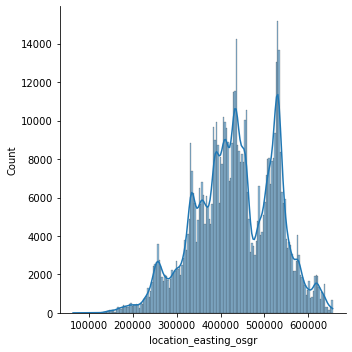

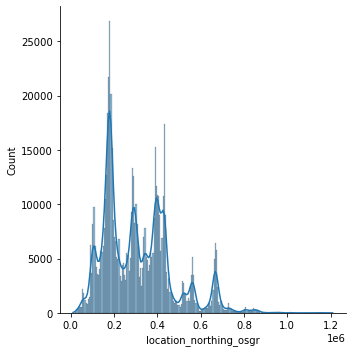

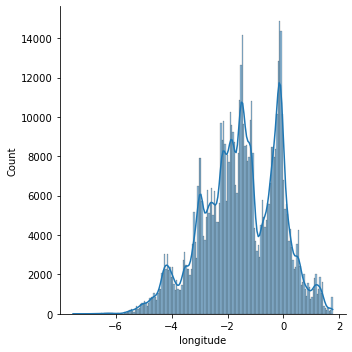

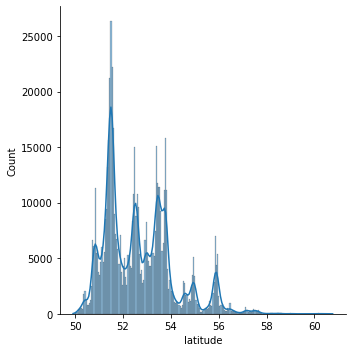

In [19]:
all_df_location= all_df[['location_easting_osgr','location_northing_osgr', 'longitude', 'latitude']]

for column in all_df_location.columns:
    sns.displot(all_df_location[column], kde=True)
    plt.show()

In [20]:
# Binning the easting and northing columns into 12 bins each

labels_east = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K","L"] # dummy labels.
bins_east = pd.cut(all_df['location_easting_osgr'],12, labels=labels_east)
all_df['easting_binned'] = pd.cut(all_df['location_easting_osgr'], 12, labels = labels_east).astype(object)

labels_north = ["M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W","X"] # dummy labels.
bins_north = pd.cut(all_df['location_northing_osgr'],12, labels=labels_north)
all_df['northing_binned'] = pd.cut(all_df['location_northing_osgr'], 12, labels = labels_north).astype(object)


In [21]:
bins_east.value_counts()


H    141643
J    122378
G    108447
F     77417
I     76132
K     33296
E     30902
D     21748
L     15251
C      5413
B       923
A        35
Name: location_easting_osgr, dtype: int64

In [22]:
bins_north.value_counts()


N    194951
P    128582
O    121205
Q     76216
M     40646
R     31803
S     31320
T      5097
U      3185
V       388
X       117
W        75
Name: location_northing_osgr, dtype: int64

## Creating a vehicle_brand column

In [23]:
all_df["generic_make_model"].value_counts()

Other                             564264
FORD FIESTA                         3348
VAUXHALL CORSA                      2820
VAUXHALL ASTRA                      2301
FORD FOCUS                          2186
VOLKSWAGEN GOLF                     2108
BMW 3 SERIES                        1382
VOLKSWAGEN POLO                     1367
RENAULT CLIO                        1061
TOYOTA YARIS                         982
AUDI A3                              972
BMW 1 SERIES                         900
MERCEDES C CLASS                     815
NISSAN QASHQAI                       810
VAUXHALL ZAFIRA                      739
HONDA CIVIC                          711
FIAT 500                             693
MERCEDES A CLASS                     677
MINI COOPER                          675
SEAT IBIZA                           632
NISSAN MICRA                         620
FORD TRANSIT                         617
HONDA JAZZ                           559
SEAT LEON                            551
FORD MONDEO     

In [24]:
# Information about the UK's most common car brands are found in a website:
# https://www.comparethemarket.com/car-insurance/content/how-common-is-your-car/

def brand(txt):
    first_part = txt.split(" ")[0]
    
    if 'FORD' in first_part:
        return 'FORD'
    elif 'VAUXHALL' in first_part:
        return 'VAUXHALL'
    elif 'VOLKSWAGEN' in first_part:
        return 'VOLKSWAGEN'
    elif 'BMW' in first_part:
        return 'BMW'
    elif 'AUDI' in first_part:
        return 'AUDI'
    elif 'TOYOTA' in first_part:
        return 'TOYOTA'
    elif 'NISSAN' in first_part:
        return 'NISSAN'
    elif 'MERCEDES' in first_part:
        return 'MERCEDES'
    elif 'PEUGEOT' in first_part:
        return 'PEUGEOT'
    elif 'RENAULT' in first_part:
        return 'RENAULT'
    elif 'HONDA' in first_part:
        return 'HONDA'
    elif 'CITROEN' in first_part:
        return 'CITROEN'
    elif 'Hyundai' in first_part:
        return 'Hyundai'
    elif 'LAND' in first_part:
        return 'LAND ROVER'
    elif 'KIA' in first_part:
        return 'KIA'
    elif 'MINI' in first_part:
        return 'MINI'
    elif 'SKODA' in first_part:
        return 'SKODA'
    elif 'FIAT' in first_part:
        return 'FIAT'
    elif 'VOLVO' in first_part:
        return 'VOLVO'
    elif 'MAZDA' in first_part:
        return 'MAZDA'
    elif 'SEAT' in first_part:
        return 'SEAT'
    elif 'SUZUKI' in first_part:
        return 'SUZUKI'
    elif 'JAGUAR' in first_part:
        return 'JAGUAR'
    elif 'MITSUBISHI' in first_part:
        return 'MITSUBISHI'
    elif 'LEXUS' in first_part:
        return 'LEXUS'
    elif 'PORSCHE' in first_part:
        return 'PORSCHE'
    elif 'DACIA' in first_part:
        return 'DACIA'
    elif 'SAAB' in first_part:
        return 'SAAB'
    elif 'CHEVROLET' in first_part:
        return 'CHEVROLET'
    elif 'SMART' in first_part:
        return 'SMART'
    elif 'ALFA' in first_part:
        return 'ALFA ROMEO'
    elif 'JEEP' in first_part:
        return 'JEEP'
    else:
        return 'Other'

all_df['vehicle_brand'] = all_df['generic_make_model'].apply(brand)


#display(all_df.tail(20))

In [25]:
all_df['vehicle_brand'].value_counts(dropna=False)

Other         570631
FORD            9157
VAUXHALL        8025
VOLKSWAGEN      5544
BMW             3974
HONDA           3664
TOYOTA          3331
MERCEDES        3217
PEUGEOT         3158
AUDI            3061
NISSAN          2593
RENAULT         2403
CITROEN         1995
SEAT            1480
FIAT            1406
SKODA           1400
KIA             1360
SUZUKI          1325
MINI            1168
LAND ROVER      1025
VOLVO            995
MAZDA            737
JAGUAR           401
MITSUBISHI       380
DACIA            215
CHEVROLET        185
LEXUS            182
SMART            154
SAAB             108
ALFA ROMEO       107
JEEP             103
PORSCHE          101
Name: vehicle_brand, dtype: int64

In [26]:
#all_df.dtypes

# Outlier detection

In [27]:
def plot_boxplot(df): 
    for column in df.columns:
        sns.boxplot(y=df[column])
        plt.show()
    return None


In [28]:
all_df.head()

,age_of_driver,engine_capacity_cc,age_of_vehicle,accident_index,accident_year_x,accident_reference_x,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_band_of_driver,propulsion_code,generic_make_model,driver_imd_decile,driver_home_area_type,accident_year_y,accident_reference_y,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,month,age_of_casualty,accident_year,accident_reference,casualty_reference,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,hour,easting_binned,northing_binned,vehicle_brand
0,23,124,4,2016010000005,2016,010000005,2,2.0,0.0,18.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,1.0,5.0,1.0,Other,4.0,1.0,2016,010000005,519310,188730.0,-0.279323,51.584754,1,3,2,1,2016-01-11,3,02:30,28.0,E09000005,E09000005,3,4006,6.0,30.0,0.0,4.0,6.0,0.0,0.0,0.0,5.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01000543,1,23,2016,010000005,1,1,1.0,5.0,3,0.0,0.0,0.0,0.0,0.0,2.0,1.0,4.0,02,J,N,Other
1,36,1461,1,2016010000006,2016,010000006,1,9.0,0.0,18.0,5.0,1.0,0.0,2.0,2.0,10.0,1.0,0.0,4.0,1.0,5.0,2.0,7.0,1.0,Other,10.0,1.0,2016,010000006,551920,174560.0,0.184928,51.449595,1,3,1,1,2016-01-11,3,00:37,18.0,E09000004,E09000004,3,207,6.0,30.0,9.0,4.0,6.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01000375,1,36,2016,010000006,1,1,2.0,7.0,3,0.0,0.0,0.0,0.0,0.0,9.0,1.0,10.0,00,J,N,Other
2,24,1390,5,2016010000008,2016,010000008,1,9.0,0.0,18.0,1.0,8.0,0.0,4.0,5.0,0.0,0.0,0.0,1.0,1.0,5.0,1.0,5.0,1.0,Other,8.0,1.0,2016,010000008,505930,183850.0,-0.473837,51.543563,1,3,1,1,2016-01-11,3,01:25,26.0,E09000017,E09000017,3,4020,1.0,30.0,1.0,4.0,3.0,4020.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01033725,1,24,2016,010000008,1,1,1.0,5.0,3,0.0,0.0,0.0,0.0,0.0,9.0,1.0,8.0,01,I,N,Other
3,55,6692,7,2016010000016,2016,010000016,1,11.0,0.0,18.0,5.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,8.0,1.0,Other,9.0,1.0,2016,010000016,527770,168930.0,-0.164442,51.404958,1,3,1,1,2016-01-11,3,09:15,22.0,E09000024,E09000024,3,217,6.0,30.0,3.0,2.0,3.0,217.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01003379,1,59,2016,010000016,1,2,2.0,9.0,3,0.0,0.0,0.0,3.0,0.0,11.0,1.0,4.0,09,J,N,Other
4,28,1856,7,2016010000018,2016,010000018,2,1.0,0.0,18.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,5.0,1.0,6.0,1.0,Other,6.0,1.0,2016,010000018,510740,177230.0,-0.406580,51.483139,1,3,2,1,2016-01-11,3,07:53,25.0,E09000018,E09000018,3,312,3.0,40.0,0.0,4.0,6.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01002583,1,28,2016,010000018,1,1,1.0,6.0,3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6.0,07,J,N,Other


In [29]:
box_df=all_df[['age_of_driver','engine_capacity_cc','age_of_vehicle','number_of_vehicles','number_of_casualties',
                   'age_of_casualty']]

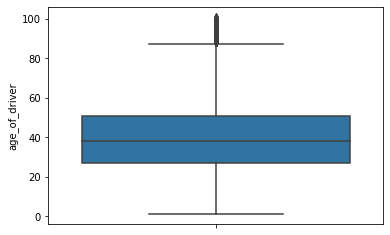

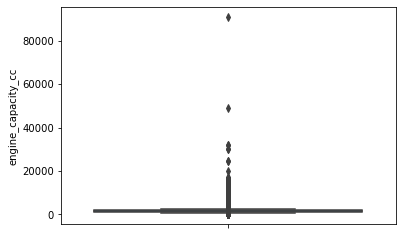

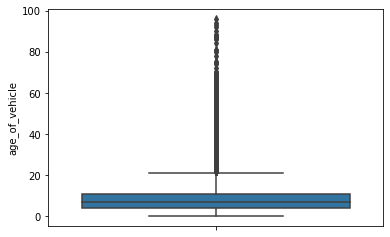

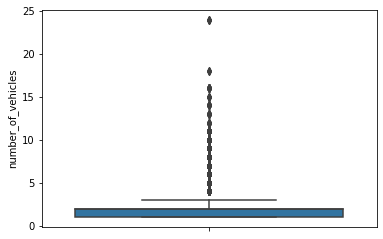

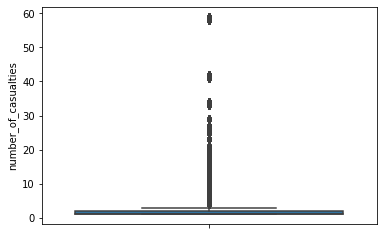

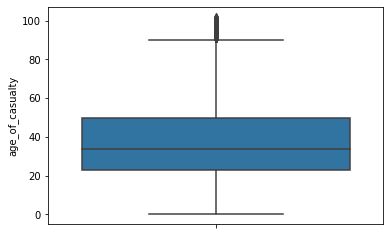

In [30]:
plot_boxplot(box_df)

In [31]:
# Checking how many values will be removed if the outliers are removed
def outliers(df,col):
    iqr = np.nanpercentile(df[col],75) - np.nanpercentile(df[col],25)
    upper_limit = np.nanpercentile(df[col],75) + 1.5*iqr # tentatively calling these outliers.
    extraordinary_points = df[df[col] >upper_limit]
    return upper_limit, len(extraordinary_points)


In [32]:
# age_of_driver
upper_limit_agedriver, total_outliers_agedriver= outliers(box_df,'age_of_driver')
print(upper_limit_agedriver) #does not seem like outlier
print(total_outliers_agedriver)

87.0
2437


In [33]:
# engine_capacity_cc
upper_limit_enginecap, total_outliers_enginecap= outliers(box_df,'engine_capacity_cc')
print(upper_limit_enginecap) 
print(total_outliers_enginecap)

2646.5
33710


In [34]:
# age_of_vehicle
upper_limit_agevehicle, total_outliers_agevehicle= outliers(box_df,'age_of_vehicle')
print(upper_limit_agevehicle) #does not seem like outlier
print(total_outliers_agevehicle)

21.5
5225


In [35]:
# number_of_vehicles
upper_limit_numofvechicles, total_outliers_numofvechicles= outliers(box_df,'number_of_vehicles')
print(upper_limit_numofvechicles) #does not seem like outlier
print(total_outliers_numofvechicles)

3.5
23153


In [36]:
# number_of_casualties
upper_limit_numofcasualties, total_outliers_numofcasualties= outliers(box_df,'number_of_casualties')
print(upper_limit_numofcasualties) #does not seem like outlier
print(total_outliers_numofcasualties)

3.5
52835


In [37]:
# age_of_casualty
upper_limit_agecasualty, total_outliers_agecasualty= outliers(box_df,'age_of_casualty')
print(upper_limit_agecasualty)
print(total_outliers_agecasualty)

90.5
1447


# Model building steps

In [38]:
all_df.shape

(633585, 83)

In [39]:
# Originally there are three classes of accident_severity in the df. To deal with some portion of 
        # the data imbalancy (because fatal class is very small compared to the other two), I group
        # "Fatal" and "Serious" accidents together into "Serious". At the end, both fatal and serious
        # accidents would need similar level of attention.
        
all_df['accident_severity']= all_df['accident_severity'].replace({1:'Serious', 2:'Serious', 3:'Slight'})

In [40]:
all_df_2017 = all_df[all_df.accident_year == 2017]

In [41]:
all_df_2017.shape

(129846, 83)

## Outlier Removal

In [42]:
def outliers(column, threshold = 3):
    data = column[abs(column.apply(lambda x: (x - column.mean())/column.var()**(1/2))) > threshold]    
    return data

In [43]:
NoV_outliers = outliers(all_df_2017["age_of_vehicle"])
NoD_outliers = outliers(all_df_2017["age_of_driver"])
NoE_outliers = outliers(all_df_2017["engine_capacity_cc"])

In [44]:
len(NoV_outliers)

747

In [45]:
len(NoD_outliers)

253

In [46]:
len(NoE_outliers)

2529

In [47]:
NoD_outliers.head()

181677    95
183899    90
184309    90
186157    92
186738    92
Name: age_of_driver, dtype: int64

In [48]:
NoD_outliers.value_counts()

90     89
91     46
93     32
92     30
94     24
95     13
96     12
97      5
98      1
100     1
Name: age_of_driver, dtype: int64

In [49]:
all_df_2017.shape

(129846, 83)

In [50]:
to_drop = NoV_outliers.index |  NoD_outliers.index |  NoE_outliers.index # Union



/var/folders/33/p_3l01b14g96rn22vzwly2g00000gn/T/ipykernel_16380/2593832883.py:1: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  to_drop = NoV_outliers.index |  NoD_outliers.index |  NoE_outliers.index # Union


In [51]:
all_df_2017 = all_df_2017.drop(to_drop).reset_index(drop = True)

#all_df.isna().sum()

In [52]:
len(all_df_2017)

126338

In [53]:
all_df_2017.head()

,age_of_driver,engine_capacity_cc,age_of_vehicle,accident_index,accident_year_x,accident_reference_x,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_band_of_driver,propulsion_code,generic_make_model,driver_imd_decile,driver_home_area_type,accident_year_y,accident_reference_y,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,month,age_of_casualty,accident_year,accident_reference,casualty_reference,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,hour,easting_binned,northing_binned,vehicle_brand
0,24,1997,1,2017010001708,2017,010001708,1,9.0,0.0,18.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,1.0,5.0,1.0,Other,2.0,1.0,2017,010001708,532920,196330.0,-0.080107,51.650061,1,Serious,2,3,2017-05-08,7,03:12,32.0,E09000010,E09000010,3,105,6.0,30.0,0.0,4.0,6.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01001450,5,18,2017,010001708,1,2,2.0,4.0,3,0.0,0.0,1.0,0.0,0.0,9.0,1.0,2.0,03,J,N,Other
1,19,1856,7,2017010001708,2017,010001708,2,2.0,0.0,18.0,1.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,5.0,1.0,4.0,1.0,Other,2.0,1.0,2017,010001708,532920,196330.0,-0.080107,51.650061,1,Serious,2,3,2017-05-08,7,03:12,32.0,E09000010,E09000010,3,105,6.0,30.0,0.0,4.0,6.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01001450,5,19,2017,010001708,2,1,1.0,4.0,2,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,03,J,N,Other
2,19,1856,7,2017010001708,2017,010001708,2,2.0,0.0,18.0,1.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,5.0,1.0,4.0,1.0,Other,2.0,1.0,2017,010001708,532920,196330.0,-0.080107,51.650061,1,Serious,2,3,2017-05-08,7,03:12,32.0,E09000010,E09000010,3,105,6.0,30.0,0.0,4.0,6.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01001450,5,18,2017,010001708,3,2,1.0,4.0,1,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,03,J,N,Other
3,33,1797,8,2017010009342,2017,010009342,1,9.0,0.0,18.0,5.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,5.0,1.0,6.0,8.0,Other,9.0,1.0,2017,010009342,526790,181970.0,-0.173845,51.522425,1,Slight,2,1,2017-01-01,1,01:30,1.0,E09000033,E09000033,3,5,6.0,30.0,3.0,4.0,6.0,0.0,0.0,0.0,4.0,1.0,2.0,0.0,0.0,1.0,1.0,2.0,E01004702,1,33,2017,010009342,1,2,2.0,6.0,3,0.0,0.0,1.0,0.0,0.0,9.0,1.0,5.0,01,J,N,Other
4,31,1299,14,2017010009344,2017,010009344,3,9.0,0.0,18.0,7.0,3.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,2.0,6.0,1.0,Other,5.0,1.0,2017,010009344,535200,181260.0,-0.052969,51.514096,1,Slight,3,1,2017-01-01,1,00:30,5.0,E09000030,E09000030,3,13,6.0,30.0,3.0,4.0,5.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01004298,1,31,2017,010009344,1,1,2.0,6.0,3,0.0,0.0,0.0,0.0,0.0,9.0,1.0,5.0,00,J,N,Other


In [54]:
all_df_2017.shape

(126338, 83)

In [55]:
all_df_2017.columns

Index(['age_of_driver', 'engine_capacity_cc', 'age_of_vehicle',
       'accident_index', 'accident_year_x', 'accident_reference_x',
       'vehicle_reference', 'vehicle_type', 'towing_and_articulation',
       'vehicle_manoeuvre', 'vehicle_direction_from', 'vehicle_direction_to',
       'vehicle_location_restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       'first_point_of_impact', 'vehicle_left_hand_drive',
       'journey_purpose_of_driver', 'sex_of_driver', 'age_band_of_driver',
       'propulsion_code', 'generic_make_model', 'driver_imd_decile',
       'driver_home_area_type', 'accident_year_y', 'accident_reference_y',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district',

## X-y split

In [56]:
# Need to X-y-split AND train-test-split BEFORE I apply transformations, 
# then train transformation on training set only.

y = all_df_2017['accident_severity']
X = all_df_2017.drop(columns=['accident_severity'], axis=1)

X=X[['age_of_driver', 'engine_capacity_cc', 'age_of_vehicle','vehicle_type','vehicle_brand',
       'vehicle_manoeuvre','junction_location','first_point_of_impact', 'vehicle_left_hand_drive',
       'journey_purpose_of_driver', 'sex_of_driver','propulsion_code', 'towing_and_articulation',
       'driver_imd_decile','driver_home_area_type', 'day_of_week', 'month','hour',
       'easting_binned','northing_binned', 'vehicle_direction_from', 'vehicle_direction_to',
       'vehicle_location_restricted_lane', 'first_road_class','road_type', 'speed_limit', 
       'junction_detail', 'junction_control', 'second_road_class','pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions', 'weather_conditions',
       'road_surface_conditions','special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area','trunk_road_flag']]

display(y.shape)
display(X.shape)

(126338,)

(126338, 38)

<AxesSubplot:xlabel='accident_severity'>

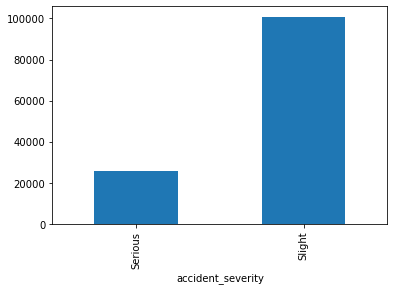

In [57]:
y_df=pd.DataFrame(y)
y_df.pivot_table(index='accident_severity', aggfunc='size').plot(kind='bar')


In [58]:
display(X.dtypes)
display(y.dtypes)

age_of_driver                               int64
engine_capacity_cc                          int64
age_of_vehicle                              int64
vehicle_type                               object
vehicle_brand                              object
vehicle_manoeuvre                          object
junction_location                          object
first_point_of_impact                      object
vehicle_left_hand_drive                    object
journey_purpose_of_driver                  object
sex_of_driver                              object
propulsion_code                            object
towing_and_articulation                    object
driver_imd_decile                          object
driver_home_area_type                      object
day_of_week                                object
month                                      object
hour                                       object
easting_binned                             object
northing_binned                            object


dtype('O')

## Ordinal Encoding

In [59]:
X["vehicle_type"] = X["vehicle_type"].replace({"1" : "1", "2" : "2", "3" : "2", "4" : "2", "5" : "2", "8" : "3", "9" : "3"
                                          , "10" : "4", "11" : "5", "16" : "2", "17" : "5", "18" : "6", "19" : "7", 
                                           "20" : "7", "21" : "7", "22" : "2", "23" : "2", "90" : "3", "97" : "2",
                                           "98" : "7", "99" : "3", "103" : "2", "104" : "2", "105" : "2", "106" : "2",
                                           "108" : "3", "109" : "3", "110" : "4", 
                                           "103" : "7" }).astype(int)

X["vehicle_type"] = pd.to_numeric(X["vehicle_type"], errors='coerce')

X.head()


,age_of_driver,engine_capacity_cc,age_of_vehicle,vehicle_type,vehicle_brand,vehicle_manoeuvre,junction_location,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,propulsion_code,towing_and_articulation,driver_imd_decile,driver_home_area_type,day_of_week,month,hour,easting_binned,northing_binned,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,first_road_class,road_type,speed_limit,junction_detail,junction_control,second_road_class,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag
0,24,1997,1,9,Other,18.0,0.0,1.0,1.0,5.0,1.0,1.0,0.0,2.0,1.0,7,5,03,J,N,1.0,5.0,0.0,3,6.0,30.0,0.0,4.0,6.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,2.0
1,19,1856,7,2,Other,18.0,0.0,2.0,1.0,5.0,1.0,1.0,0.0,2.0,1.0,7,5,03,J,N,1.0,5.0,0.0,3,6.0,30.0,0.0,4.0,6.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,2.0
2,19,1856,7,2,Other,18.0,0.0,2.0,1.0,5.0,1.0,1.0,0.0,2.0,1.0,7,5,03,J,N,1.0,5.0,0.0,3,6.0,30.0,0.0,4.0,6.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,2.0
3,33,1797,8,9,Other,18.0,1.0,2.0,1.0,5.0,1.0,8.0,0.0,9.0,1.0,1,1,01,J,N,5.0,1.0,0.0,3,6.0,30.0,3.0,4.0,6.0,0.0,0.0,4.0,1.0,2.0,0.0,0.0,1.0,2.0
4,31,1299,14,9,Other,18.0,2.0,1.0,1.0,5.0,2.0,1.0,0.0,5.0,1.0,1,1,00,J,N,7.0,3.0,0.0,3,6.0,30.0,3.0,4.0,5.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,2.0


In [60]:
X.dtypes

age_of_driver                               int64
engine_capacity_cc                          int64
age_of_vehicle                              int64
vehicle_type                                int64
vehicle_brand                              object
vehicle_manoeuvre                          object
junction_location                          object
first_point_of_impact                      object
vehicle_left_hand_drive                    object
journey_purpose_of_driver                  object
sex_of_driver                              object
propulsion_code                            object
towing_and_articulation                    object
driver_imd_decile                          object
driver_home_area_type                      object
day_of_week                                object
month                                      object
hour                                       object
easting_binned                             object
northing_binned                            object


## Train-test split

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#stratify option is used here because the class sizes in the target is imbalanced. Stratified sampling 
#will ensure the same proportions of class size in the train and test target set as the original dataframe.

<AxesSubplot:xlabel='accident_severity'>

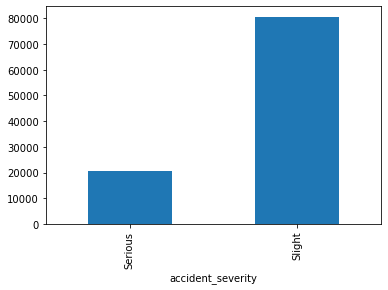

In [62]:
# verifying that class distribution in the train set is same as the input data

y_train_df=pd.DataFrame(y_train)
y_train_df.pivot_table(index='accident_severity', aggfunc='size').plot(kind='bar')


## MinMaxScaling & Encoding (X_train)

In [63]:
#MinMaxScaling

from sklearn.preprocessing import MinMaxScaler

X_train_num = X_train.select_dtypes(include = np.number)

transformer = MinMaxScaler().fit(X_train_num) # we'll keep the transformer
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized, columns=X_train_num.columns)
X_train_norm.head()

,age_of_driver,engine_capacity_cc,age_of_vehicle,vehicle_type
0,0.356322,0.239669,0.136364,0.082474
1,0.264368,0.236018,0.545455,0.082474
2,0.275862,0.230444,0.090909,0.082474
3,0.563218,0.359408,0.636364,0.082474
4,0.517241,0.383817,0.181818,0.072165


In [64]:
X_train_norm.shape

(101070, 4)

In [65]:
#OneHotEncoding

from sklearn.preprocessing import OneHotEncoder

X_train_categorical = X_train.select_dtypes(include = object)

encoder = OneHotEncoder(drop='first', handle_unknown = 'ignore').fit(X_train_categorical) # need to keep encoder
cols=encoder.get_feature_names_out(input_features=X_train_categorical.columns)
encoded = encoder.transform(X_train_categorical).toarray()
X_train_cat = pd.DataFrame(encoded,columns=cols)
X_train_cat.head()

,vehicle_manoeuvre_2.0,vehicle_manoeuvre_3.0,vehicle_manoeuvre_4.0,vehicle_manoeuvre_5.0,vehicle_manoeuvre_6.0,vehicle_manoeuvre_7.0,vehicle_manoeuvre_8.0,vehicle_manoeuvre_9.0,vehicle_manoeuvre_10.0,vehicle_manoeuvre_11.0,vehicle_manoeuvre_12.0,vehicle_manoeuvre_13.0,vehicle_manoeuvre_14.0,vehicle_manoeuvre_15.0,vehicle_manoeuvre_16.0,vehicle_manoeuvre_17.0,vehicle_manoeuvre_18.0,junction_location_1.0,junction_location_2.0,junction_location_3.0,junction_location_4.0,junction_location_5.0,junction_location_6.0,junction_location_7.0,junction_location_8.0,first_point_of_impact_1.0,first_point_of_impact_2.0,first_point_of_impact_3.0,first_point_of_impact_4.0,vehicle_left_hand_drive_2.0,journey_purpose_of_driver_2.0,journey_purpose_of_driver_3.0,journey_purpose_of_driver_4.0,journey_purpose_of_driver_5.0,sex_of_driver_2.0,propulsion_code_3.0,propulsion_code_5.0,propulsion_code_6.0,propulsion_code_7.0,propulsion_code_8.0,propulsion_code_12.0,towing_and_articulation_1.0,towing_and_articulation_2.0,towing_and_articulation_3.0,towing_and_articulation_4.0,towing_and_articulation_5.0,driver_imd_decile_2.0,driver_imd_decile_3.0,driver_imd_decile_4.0,driver_imd_decile_5.0,driver_imd_decile_6.0,driver_imd_decile_7.0,driver_imd_decile_8.0,driver_imd_decile_9.0,driver_imd_decile_10.0,driver_home_area_type_2.0,driver_home_area_type_3.0,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_01,hour_02,hour_03,hour_04,hour_05,hour_06,hour_07,hour_08,hour_09,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,easting_binned_B,easting_binned_C,easting_binned_D,easting_binned_E,easting_binned_F,easting_binned_G,easting_binned_H,easting_binned_I,easting_binned_J,easting_binned_K,easting_binned_L,northing_binned_N,northing_binned_O,northing_binned_P,northing_binned_Q,northing_binned_R,northing_binned_S,northing_binned_T,northing_binned_U,northing_binned_V,northing_binned_W,northing_binned_X,vehicle_direction_from_1.0,vehicle_direction_from_2.0,vehicle_direction_from_3.0,vehicle_direction_from_4.0,vehicle_direction_from_5.0,vehicle_direction_from_6.0,vehicle_direction_from_7.0,vehicle_direction_from_8.0,vehicle_direction_to_1.0,vehicle_direction_to_2.0,vehicle_direction_to_3.0,vehicle_direction_to_4.0,vehicle_direction_to_5.0,vehicle_direction_to_6.0,vehicle_direction_to_7.0,vehicle_direction_to_8.0,vehicle_location_restricted_lane_1.0,vehicle_location_restricted_lane_2.0,vehicle_location_restricted_lane_3.0,vehicle_location_restricted_lane_4.0,vehicle_location_restricted_lane_5.0,vehicle_location_restricted_lane_6.0,vehicle_location_restricted_lane_7.0,vehicle_location_restricted_lane_8.0,vehicle_location_restricted_lane_9.0,first_road_class_2,first_road_class_3,first_road_class_4,first_road_class_5,first_road_class_6,road_type_2.0,road_type_3.0,road_type_6.0,road_type_7.0,speed_limit_30.0,speed_limit_40.0,speed_limit_50.0,speed_limit_60.0,speed_limit_70.0,junction_detail_1.0,junction_detail_2.0,junction_detail_3.0,junction_detail_5.0,junction_detail_6.0,junction_detail_7.0,junction_detail_8.0,junction_detail_9.0,junction_control_2.0,junction_control_3.0,junction_control_4.0,junction_control_9.0,second_road_class_2.0,second_road_class_3.0,second_road_class_4.0,second_road_class_5.0,second_road_class_6.0,pedestrian_crossing_human_control_1.0,pedestrian_crossing_human_control_2.0,pedestrian_crossing_physical_facilities_1.0,pedestrian_crossing_physical_facilities_4.0,pedestrian_crossing_physical_facilities_5.0,pedestrian_crossing_physical_facilities_7.0,pedestrian_crossing_physical_facilities_8.0,light_conditions_4.0,light_conditions_5.0,light_conditions_6.0,light_conditions_7.0,weather_conditions_2.0,weather_conditions_3.0,weather_conditions_4.0,weather_conditions_5.0,weather_conditions_6.0,weather_conditions_7.0,weather_conditions_8.0,road_surface_conditions_2.0,road_s

In [66]:
X_train_cat.shape

(101070, 211)

In [67]:
# Building the transformed X_train by concatenating X_train_norm and X_train_cat

X_train_transformed = np.concatenate([X_train_norm, X_train_cat], axis=1)

## MinMaxScaling & Encoding (X_test)

In [68]:
# MinMaxScaling
X_test_num = X_test.select_dtypes(include = np.number) # for numericals

X_test_normalized = transformer.transform(X_test_num) # using the transformer that was trained on the training data
X_test_norm = pd.DataFrame(X_test_normalized)

# OneHotEncoding
X_test_categorical = X_test.select_dtypes(include = object) # for categoricals

cols=encoder.get_feature_names_out(input_features=X_test_categorical.columns)
encoded = encoder.transform(X_test_categorical).toarray() # using the encoder that was trained on the training data
X_test_cat = pd.DataFrame(encoded,columns=cols)
X_test_cat.head()

,vehicle_manoeuvre_2.0,vehicle_manoeuvre_3.0,vehicle_manoeuvre_4.0,vehicle_manoeuvre_5.0,vehicle_manoeuvre_6.0,vehicle_manoeuvre_7.0,vehicle_manoeuvre_8.0,vehicle_manoeuvre_9.0,vehicle_manoeuvre_10.0,vehicle_manoeuvre_11.0,vehicle_manoeuvre_12.0,vehicle_manoeuvre_13.0,vehicle_manoeuvre_14.0,vehicle_manoeuvre_15.0,vehicle_manoeuvre_16.0,vehicle_manoeuvre_17.0,vehicle_manoeuvre_18.0,junction_location_1.0,junction_location_2.0,junction_location_3.0,junction_location_4.0,junction_location_5.0,junction_location_6.0,junction_location_7.0,junction_location_8.0,first_point_of_impact_1.0,first_point_of_impact_2.0,first_point_of_impact_3.0,first_point_of_impact_4.0,vehicle_left_hand_drive_2.0,journey_purpose_of_driver_2.0,journey_purpose_of_driver_3.0,journey_purpose_of_driver_4.0,journey_purpose_of_driver_5.0,sex_of_driver_2.0,propulsion_code_3.0,propulsion_code_5.0,propulsion_code_6.0,propulsion_code_7.0,propulsion_code_8.0,propulsion_code_12.0,towing_and_articulation_1.0,towing_and_articulation_2.0,towing_and_articulation_3.0,towing_and_articulation_4.0,towing_and_articulation_5.0,driver_imd_decile_2.0,driver_imd_decile_3.0,driver_imd_decile_4.0,driver_imd_decile_5.0,driver_imd_decile_6.0,driver_imd_decile_7.0,driver_imd_decile_8.0,driver_imd_decile_9.0,driver_imd_decile_10.0,driver_home_area_type_2.0,driver_home_area_type_3.0,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_01,hour_02,hour_03,hour_04,hour_05,hour_06,hour_07,hour_08,hour_09,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,easting_binned_B,easting_binned_C,easting_binned_D,easting_binned_E,easting_binned_F,easting_binned_G,easting_binned_H,easting_binned_I,easting_binned_J,easting_binned_K,easting_binned_L,northing_binned_N,northing_binned_O,northing_binned_P,northing_binned_Q,northing_binned_R,northing_binned_S,northing_binned_T,northing_binned_U,northing_binned_V,northing_binned_W,northing_binned_X,vehicle_direction_from_1.0,vehicle_direction_from_2.0,vehicle_direction_from_3.0,vehicle_direction_from_4.0,vehicle_direction_from_5.0,vehicle_direction_from_6.0,vehicle_direction_from_7.0,vehicle_direction_from_8.0,vehicle_direction_to_1.0,vehicle_direction_to_2.0,vehicle_direction_to_3.0,vehicle_direction_to_4.0,vehicle_direction_to_5.0,vehicle_direction_to_6.0,vehicle_direction_to_7.0,vehicle_direction_to_8.0,vehicle_location_restricted_lane_1.0,vehicle_location_restricted_lane_2.0,vehicle_location_restricted_lane_3.0,vehicle_location_restricted_lane_4.0,vehicle_location_restricted_lane_5.0,vehicle_location_restricted_lane_6.0,vehicle_location_restricted_lane_7.0,vehicle_location_restricted_lane_8.0,vehicle_location_restricted_lane_9.0,first_road_class_2,first_road_class_3,first_road_class_4,first_road_class_5,first_road_class_6,road_type_2.0,road_type_3.0,road_type_6.0,road_type_7.0,speed_limit_30.0,speed_limit_40.0,speed_limit_50.0,speed_limit_60.0,speed_limit_70.0,junction_detail_1.0,junction_detail_2.0,junction_detail_3.0,junction_detail_5.0,junction_detail_6.0,junction_detail_7.0,junction_detail_8.0,junction_detail_9.0,junction_control_2.0,junction_control_3.0,junction_control_4.0,junction_control_9.0,second_road_class_2.0,second_road_class_3.0,second_road_class_4.0,second_road_class_5.0,second_road_class_6.0,pedestrian_crossing_human_control_1.0,pedestrian_crossing_human_control_2.0,pedestrian_crossing_physical_facilities_1.0,pedestrian_crossing_physical_facilities_4.0,pedestrian_crossing_physical_facilities_5.0,pedestrian_crossing_physical_facilities_7.0,pedestrian_crossing_physical_facilities_8.0,light_conditions_4.0,light_conditions_5.0,light_conditions_6.0,light_conditions_7.0,weather_conditions_2.0,weather_conditions_3.0,weather_conditions_4.0,weather_conditions_5.0,weather_conditions_6.0,weather_conditions_7.0,weather_conditions_8.0,road_surface_conditions_2.0,road_s

In [69]:
display(X_test_norm.shape)
display(X_test_cat.shape)

(25268, 4)

(25268, 211)

In [70]:
#Concatenation
X_test_transformed = np.concatenate([X_test_norm, X_test_cat], axis=1)

# Logistic Regression

In [71]:
#Building the model with training data

from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=42, solver='saga').fit(X_train_transformed, y_train)

In [72]:
# If this was a multiclass classification, I would add: multi_class='multinomial'

## Prediction

In [73]:
# Now we can make predictions on the test set:
predictions = classification.predict(X_test_transformed)
predictions

array(['Slight', 'Slight', 'Slight', ..., 'Slight', 'Slight', 'Slight'],
      dtype=object)

In [74]:
print("accuracy: ", classification.score(X_test_transformed, y_test))

accuracy:  0.7988364730093399


In [75]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("precision: ",precision_score(y_test,predictions, pos_label='Serious' )) 
print("recall: ",recall_score(y_test,predictions, pos_label='Serious' ))
print("f1: ",f1_score(y_test,predictions, pos_label='Serious'))

# if this was a multiclass classification, I would delete: pos_label='Serious', and add: average='weighted'
# average parameter is required for multiclass/multilabel targets.
# average='weighted':
# Calculate metrics for each label, and find their average weighted by support 
    #(the number of true instances for each label). This alters ‘macro’ to account for label imbalance; 
    #it can result in an F-score that is not between precision and recall.

precision:  0.5348258706467661
recall:  0.04206613187243201
f1:  0.07799746054779612


In [76]:
y_test.head()

30986    Slight
80884    Slight
3549     Slight
33536    Slight
65270    Slight
Name: accident_severity, dtype: object

In [77]:
print(y_test.value_counts())

Slight     20157
Serious     5111
Name: accident_severity, dtype: int64


In [78]:
predictions

array(['Slight', 'Slight', 'Slight', ..., 'Slight', 'Slight', 'Slight'],
      dtype=object)

In [79]:
pd.Series(predictions).value_counts()

Slight     24866
Serious      402
dtype: int64

In [80]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[  215,  4896],
       [  187, 19970]])

In [81]:
# predicted        |  Serious | Slight  
# --------------------------------------
# actual  Serious |   215    |  4896
# --------------------------------------
#         Slight |    187   |  19970   
# --------------------------------------


In [82]:
# The accuracy of 0.80 is not bad at first sight but the confusion matrix tells a different story.
# This model fails in predicting the seriously-severe accidents. And this is too expensive! 
# In our case, false positives are much more preferred to false negatives. In other words, we would prefer
# a potentially 'slightly-severe' accident to be predicted as 'seriously-severe', rather than a 
# 'seriously-severe' potential accident to be predicted as 'slightly-severe'. 

# If anything at all, this could even be beneficial for the drivers that are prone to slightly-severe
# accidents because they would be more alert on the road due to the harsh prediction of a 'severe' accident.

# Part of the reason that the current model fails is that the class sizes in the target is imbalanced.
# We will deal with this imbalancy in 10.2, 10.3, and 10.4 to improve the model. In principle, the methods
# to handle the imbalacy in the data SMOTE, oversampling, and undersampling increase recall
# at the cost of lower precision. This would also be our preference in this case, as explained above.


In [83]:
# For comparison:

# If we had not built a model, the accuracy of simply predicting every accident occurence as 'Severe' 
    #for all cases would be 0.20.

(4802+440)/(20728+4802+440)

0.2018482864844051

## SMOTE

In [84]:
from imblearn.over_sampling import SMOTE #creates synthetic samples using KNN
sm = SMOTE(random_state=42, k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_transformed,y_train)
X_train_SMOTE.shape

(161252, 215)

In [85]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=42, solver='saga') # for multiclass, add: multi_class='multinomial'
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test_transformed)

print("precision: ",precision_score(y_test,pred,pos_label='Serious'))
print("recall: ",recall_score(y_test,pred,pos_label='Serious'))
print("f1: ",f1_score(y_test,pred,pos_label='Serious'))

# for multiclass: delete pos_label='Serious', and add average='weighted'

precision:  0.297835733043557
recall:  0.643513989434553
f1:  0.4072056456605175


In [86]:
LR.score(X_test_transformed, y_test)

0.6210226373278455

In [87]:
print(y_train_SMOTE.value_counts())

Serious    80626
Slight     80626
Name: accident_severity, dtype: int64


In [88]:
print(y_test.value_counts())

Slight     20157
Serious     5111
Name: accident_severity, dtype: int64


In [89]:
pd.Series(pred).value_counts()

Slight     14225
Serious    11043
dtype: int64

In [90]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[ 3289,  1822],
       [ 7754, 12403]])

In [91]:
# predicted        |  Serious | Slight  
# --------------------------------------
# actual  Serious |   3289    |  1822
# --------------------------------------
#         Slight |    7754   |  12403   
# --------------------------------------


## Oversampling

In [92]:
from sklearn.utils import resample # this function does over and under sampling

In [93]:
# We will need to concat the training X and y to do oversampling and undersampling. 
# For that, index-resetting is needed because the transformations resetted the index for X_train_transformed

y_train = y_train.reset_index(drop=True) 

y_test = y_test.reset_index(drop=True) 

In [94]:
y_train.head()

0    Serious
1     Slight
2     Slight
3     Slight
4     Slight
Name: accident_severity, dtype: object

In [95]:
X_train_transformed_df = pd.concat([X_train_norm, X_train_cat], axis=1)
X_test_transformed_df = pd.concat([X_test_norm, X_test_cat], axis=1)

In [96]:
train = pd.concat([X_train_transformed_df, y_train],axis=1)
train.head()


,age_of_driver,engine_capacity_cc,age_of_vehicle,vehicle_type,vehicle_manoeuvre_2.0,vehicle_manoeuvre_3.0,vehicle_manoeuvre_4.0,vehicle_manoeuvre_5.0,vehicle_manoeuvre_6.0,vehicle_manoeuvre_7.0,vehicle_manoeuvre_8.0,vehicle_manoeuvre_9.0,vehicle_manoeuvre_10.0,vehicle_manoeuvre_11.0,vehicle_manoeuvre_12.0,vehicle_manoeuvre_13.0,vehicle_manoeuvre_14.0,vehicle_manoeuvre_15.0,vehicle_manoeuvre_16.0,vehicle_manoeuvre_17.0,vehicle_manoeuvre_18.0,junction_location_1.0,junction_location_2.0,junction_location_3.0,junction_location_4.0,junction_location_5.0,junction_location_6.0,junction_location_7.0,junction_location_8.0,first_point_of_impact_1.0,first_point_of_impact_2.0,first_point_of_impact_3.0,first_point_of_impact_4.0,vehicle_left_hand_drive_2.0,journey_purpose_of_driver_2.0,journey_purpose_of_driver_3.0,journey_purpose_of_driver_4.0,journey_purpose_of_driver_5.0,sex_of_driver_2.0,propulsion_code_3.0,propulsion_code_5.0,propulsion_code_6.0,propulsion_code_7.0,propulsion_code_8.0,propulsion_code_12.0,towing_and_articulation_1.0,towing_and_articulation_2.0,towing_and_articulation_3.0,towing_and_articulation_4.0,towing_and_articulation_5.0,driver_imd_decile_2.0,driver_imd_decile_3.0,driver_imd_decile_4.0,driver_imd_decile_5.0,driver_imd_decile_6.0,driver_imd_decile_7.0,driver_imd_decile_8.0,driver_imd_decile_9.0,driver_imd_decile_10.0,driver_home_area_type_2.0,driver_home_area_type_3.0,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_01,hour_02,hour_03,hour_04,hour_05,hour_06,hour_07,hour_08,hour_09,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,easting_binned_B,easting_binned_C,easting_binned_D,easting_binned_E,easting_binned_F,easting_binned_G,easting_binned_H,easting_binned_I,easting_binned_J,easting_binned_K,easting_binned_L,northing_binned_N,northing_binned_O,northing_binned_P,northing_binned_Q,northing_binned_R,northing_binned_S,northing_binned_T,northing_binned_U,northing_binned_V,northing_binned_W,northing_binned_X,vehicle_direction_from_1.0,vehicle_direction_from_2.0,vehicle_direction_from_3.0,vehicle_direction_from_4.0,vehicle_direction_from_5.0,vehicle_direction_from_6.0,vehicle_direction_from_7.0,vehicle_direction_from_8.0,vehicle_direction_to_1.0,vehicle_direction_to_2.0,vehicle_direction_to_3.0,vehicle_direction_to_4.0,vehicle_direction_to_5.0,vehicle_direction_to_6.0,vehicle_direction_to_7.0,vehicle_direction_to_8.0,vehicle_location_restricted_lane_1.0,vehicle_location_restricted_lane_2.0,vehicle_location_restricted_lane_3.0,vehicle_location_restricted_lane_4.0,vehicle_location_restricted_lane_5.0,vehicle_location_restricted_lane_6.0,vehicle_location_restricted_lane_7.0,vehicle_location_restricted_lane_8.0,vehicle_location_restricted_lane_9.0,first_road_class_2,first_road_class_3,first_road_class_4,first_road_class_5,first_road_class_6,road_type_2.0,road_type_3.0,road_type_6.0,road_type_7.0,speed_limit_30.0,speed_limit_40.0,speed_limit_50.0,speed_limit_60.0,speed_limit_70.0,junction_detail_1.0,junction_detail_2.0,junction_detail_3.0,junction_detail_5.0,junction_detail_6.0,junction_detail_7.0,junction_detail_8.0,junction_detail_9.0,junction_control_2.0,junction_control_3.0,junction_control_4.0,junction_control_9.0,second_road_class_2.0,second_road_class_3.0,second_road_class_4.0,second_road_class_5.0,second_road_class_6.0,pedestrian_crossing_human_control_1.0,pedestrian_crossing_human_control_2.0,pedestrian_crossing_physical_facilities_1.0,pedestrian_crossing_physical_facilities_4.0,pedestrian_crossing_physical_facilities_5.0,pedestrian_crossing_physical_facilities_7.0,pedestrian_crossing_physical_facilities_8.0,light_conditions_4.0,light_conditions_5.0,light_conditions_6.0,light_conditions_7.0,weather_conditions_2.0,weather_conditions_3.0,weather_conditions_4.0,weather_conditions_5.0,weather_conditions_6.0,weather_conditions_

In [97]:
slight = train[train['accident_severity']=='Slight']
serious = train[train['accident_severity']=='Serious']

In [98]:
display(slight.shape)
display(serious.shape)

(80626, 216)

(20444, 216)

In [99]:
# oversample minority
serious_oversampled = resample(serious, #<- sample from here
                                replace=True, #<- we need replacement, since we don't have enough data otherwise
                                n_samples = len(slight))#<- make both sets the same size


In [100]:
# both sets are now of a reasonable size
display(slight.shape)
display(serious_oversampled.shape)
serious_oversampled.head(10)

(80626, 216)

(80626, 216)

,age_of_driver,engine_capacity_cc,age_of_vehicle,vehicle_type,vehicle_manoeuvre_2.0,vehicle_manoeuvre_3.0,vehicle_manoeuvre_4.0,vehicle_manoeuvre_5.0,vehicle_manoeuvre_6.0,vehicle_manoeuvre_7.0,vehicle_manoeuvre_8.0,vehicle_manoeuvre_9.0,vehicle_manoeuvre_10.0,vehicle_manoeuvre_11.0,vehicle_manoeuvre_12.0,vehicle_manoeuvre_13.0,vehicle_manoeuvre_14.0,vehicle_manoeuvre_15.0,vehicle_manoeuvre_16.0,vehicle_manoeuvre_17.0,vehicle_manoeuvre_18.0,junction_location_1.0,junction_location_2.0,junction_location_3.0,junction_location_4.0,junction_location_5.0,junction_location_6.0,junction_location_7.0,junction_location_8.0,first_point_of_impact_1.0,first_point_of_impact_2.0,first_point_of_impact_3.0,first_point_of_impact_4.0,vehicle_left_hand_drive_2.0,journey_purpose_of_driver_2.0,journey_purpose_of_driver_3.0,journey_purpose_of_driver_4.0,journey_purpose_of_driver_5.0,sex_of_driver_2.0,propulsion_code_3.0,propulsion_code_5.0,propulsion_code_6.0,propulsion_code_7.0,propulsion_code_8.0,propulsion_code_12.0,towing_and_articulation_1.0,towing_and_articulation_2.0,towing_and_articulation_3.0,towing_and_articulation_4.0,towing_and_articulation_5.0,driver_imd_decile_2.0,driver_imd_decile_3.0,driver_imd_decile_4.0,driver_imd_decile_5.0,driver_imd_decile_6.0,driver_imd_decile_7.0,driver_imd_decile_8.0,driver_imd_decile_9.0,driver_imd_decile_10.0,driver_home_area_type_2.0,driver_home_area_type_3.0,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_01,hour_02,hour_03,hour_04,hour_05,hour_06,hour_07,hour_08,hour_09,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,easting_binned_B,easting_binned_C,easting_binned_D,easting_binned_E,easting_binned_F,easting_binned_G,easting_binned_H,easting_binned_I,easting_binned_J,easting_binned_K,easting_binned_L,northing_binned_N,northing_binned_O,northing_binned_P,northing_binned_Q,northing_binned_R,northing_binned_S,northing_binned_T,northing_binned_U,northing_binned_V,northing_binned_W,northing_binned_X,vehicle_direction_from_1.0,vehicle_direction_from_2.0,vehicle_direction_from_3.0,vehicle_direction_from_4.0,vehicle_direction_from_5.0,vehicle_direction_from_6.0,vehicle_direction_from_7.0,vehicle_direction_from_8.0,vehicle_direction_to_1.0,vehicle_direction_to_2.0,vehicle_direction_to_3.0,vehicle_direction_to_4.0,vehicle_direction_to_5.0,vehicle_direction_to_6.0,vehicle_direction_to_7.0,vehicle_direction_to_8.0,vehicle_location_restricted_lane_1.0,vehicle_location_restricted_lane_2.0,vehicle_location_restricted_lane_3.0,vehicle_location_restricted_lane_4.0,vehicle_location_restricted_lane_5.0,vehicle_location_restricted_lane_6.0,vehicle_location_restricted_lane_7.0,vehicle_location_restricted_lane_8.0,vehicle_location_restricted_lane_9.0,first_road_class_2,first_road_class_3,first_road_class_4,first_road_class_5,first_road_class_6,road_type_2.0,road_type_3.0,road_type_6.0,road_type_7.0,speed_limit_30.0,speed_limit_40.0,speed_limit_50.0,speed_limit_60.0,speed_limit_70.0,junction_detail_1.0,junction_detail_2.0,junction_detail_3.0,junction_detail_5.0,junction_detail_6.0,junction_detail_7.0,junction_detail_8.0,junction_detail_9.0,junction_control_2.0,junction_control_3.0,junction_control_4.0,junction_control_9.0,second_road_class_2.0,second_road_class_3.0,second_road_class_4.0,second_road_class_5.0,second_road_class_6.0,pedestrian_crossing_human_control_1.0,pedestrian_crossing_human_control_2.0,pedestrian_crossing_physical_facilities_1.0,pedestrian_crossing_physical_facilities_4.0,pedestrian_crossing_physical_facilities_5.0,pedestrian_crossing_physical_facilities_7.0,pedestrian_crossing_physical_facilities_8.0,light_conditions_4.0,light_conditions_5.0,light_conditions_6.0,light_conditions_7.0,weather_conditions_2.0,weather_conditions_3.0,weather_conditions_4.0,weather_conditions_5.0,weather_conditions_6.0,weather_conditions_

In [101]:
train_oversampled = pd.concat([slight,serious_oversampled],axis=0)
train_oversampled.tail()

,age_of_driver,engine_capacity_cc,age_of_vehicle,vehicle_type,vehicle_manoeuvre_2.0,vehicle_manoeuvre_3.0,vehicle_manoeuvre_4.0,vehicle_manoeuvre_5.0,vehicle_manoeuvre_6.0,vehicle_manoeuvre_7.0,vehicle_manoeuvre_8.0,vehicle_manoeuvre_9.0,vehicle_manoeuvre_10.0,vehicle_manoeuvre_11.0,vehicle_manoeuvre_12.0,vehicle_manoeuvre_13.0,vehicle_manoeuvre_14.0,vehicle_manoeuvre_15.0,vehicle_manoeuvre_16.0,vehicle_manoeuvre_17.0,vehicle_manoeuvre_18.0,junction_location_1.0,junction_location_2.0,junction_location_3.0,junction_location_4.0,junction_location_5.0,junction_location_6.0,junction_location_7.0,junction_location_8.0,first_point_of_impact_1.0,first_point_of_impact_2.0,first_point_of_impact_3.0,first_point_of_impact_4.0,vehicle_left_hand_drive_2.0,journey_purpose_of_driver_2.0,journey_purpose_of_driver_3.0,journey_purpose_of_driver_4.0,journey_purpose_of_driver_5.0,sex_of_driver_2.0,propulsion_code_3.0,propulsion_code_5.0,propulsion_code_6.0,propulsion_code_7.0,propulsion_code_8.0,propulsion_code_12.0,towing_and_articulation_1.0,towing_and_articulation_2.0,towing_and_articulation_3.0,towing_and_articulation_4.0,towing_and_articulation_5.0,driver_imd_decile_2.0,driver_imd_decile_3.0,driver_imd_decile_4.0,driver_imd_decile_5.0,driver_imd_decile_6.0,driver_imd_decile_7.0,driver_imd_decile_8.0,driver_imd_decile_9.0,driver_imd_decile_10.0,driver_home_area_type_2.0,driver_home_area_type_3.0,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_01,hour_02,hour_03,hour_04,hour_05,hour_06,hour_07,hour_08,hour_09,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,easting_binned_B,easting_binned_C,easting_binned_D,easting_binned_E,easting_binned_F,easting_binned_G,easting_binned_H,easting_binned_I,easting_binned_J,easting_binned_K,easting_binned_L,northing_binned_N,northing_binned_O,northing_binned_P,northing_binned_Q,northing_binned_R,northing_binned_S,northing_binned_T,northing_binned_U,northing_binned_V,northing_binned_W,northing_binned_X,vehicle_direction_from_1.0,vehicle_direction_from_2.0,vehicle_direction_from_3.0,vehicle_direction_from_4.0,vehicle_direction_from_5.0,vehicle_direction_from_6.0,vehicle_direction_from_7.0,vehicle_direction_from_8.0,vehicle_direction_to_1.0,vehicle_direction_to_2.0,vehicle_direction_to_3.0,vehicle_direction_to_4.0,vehicle_direction_to_5.0,vehicle_direction_to_6.0,vehicle_direction_to_7.0,vehicle_direction_to_8.0,vehicle_location_restricted_lane_1.0,vehicle_location_restricted_lane_2.0,vehicle_location_restricted_lane_3.0,vehicle_location_restricted_lane_4.0,vehicle_location_restricted_lane_5.0,vehicle_location_restricted_lane_6.0,vehicle_location_restricted_lane_7.0,vehicle_location_restricted_lane_8.0,vehicle_location_restricted_lane_9.0,first_road_class_2,first_road_class_3,first_road_class_4,first_road_class_5,first_road_class_6,road_type_2.0,road_type_3.0,road_type_6.0,road_type_7.0,speed_limit_30.0,speed_limit_40.0,speed_limit_50.0,speed_limit_60.0,speed_limit_70.0,junction_detail_1.0,junction_detail_2.0,junction_detail_3.0,junction_detail_5.0,junction_detail_6.0,junction_detail_7.0,junction_detail_8.0,junction_detail_9.0,junction_control_2.0,junction_control_3.0,junction_control_4.0,junction_control_9.0,second_road_class_2.0,second_road_class_3.0,second_road_class_4.0,second_road_class_5.0,second_road_class_6.0,pedestrian_crossing_human_control_1.0,pedestrian_crossing_human_control_2.0,pedestrian_crossing_physical_facilities_1.0,pedestrian_crossing_physical_facilities_4.0,pedestrian_crossing_physical_facilities_5.0,pedestrian_crossing_physical_facilities_7.0,pedestrian_crossing_physical_facilities_8.0,light_conditions_4.0,light_conditions_5.0,light_conditions_6.0,light_conditions_7.0,weather_conditions_2.0,weather_conditions_3.0,weather_conditions_4.0,weather_conditions_5.0,weather_conditions_6.0,weather_conditions_

In [102]:
y_train_over = train_oversampled['accident_severity'].copy()
X_train_over = train_oversampled.drop('accident_severity',axis = 1).copy()

In [103]:
# The Logistic Regression, while still not amazing, has improved,
# especially at detecting instances of seriously severe accidents
LR_over = LogisticRegression(solver='saga').fit(X_train_over, y_train_over)
pred_over = LR_over.predict(X_test_transformed)

print("precision: ",precision_score(y_test,pred_over,pos_label='Serious'))
print("recall: ",recall_score(y_test,pred_over,pos_label='Serious'))
print("f1: ",f1_score(y_test,pred_over,pos_label='Serious'))

/Users/elifyildirim/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


precision:  0.3017467248908297
recall:  0.6759929563686167
f1:  0.4172453354266047


In [104]:
LR_over.score(X_test_transformed, y_test)

/Users/elifyildirim/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.6180544562292227

In [105]:
print(y_test.value_counts())

Slight     20157
Serious     5111
Name: accident_severity, dtype: int64


In [106]:
pd.Series(pred_over).value_counts()

Slight     13818
Serious    11450
dtype: int64

In [107]:
confusion_matrix(y_test,pred_over)

array([[ 3455,  1656],
       [ 7995, 12162]])

In [108]:
# predicted        |  Serious | Slight  
# --------------------------------------
# actual  Serious |   3455    |  1656
# --------------------------------------
#         Slight |    7995   |  12162   
# --------------------------------------


## Undersampling

In [109]:
# undersample majority
slight_undersampled = resample(slight, #<- downsample from here
                                    replace=False, #<- no need to reuse data now, we have an abundance
                                    n_samples = len(serious))

In [110]:
# both sets are the same size
# small, but balanced, and no repeated data
display(serious.shape)
display(slight_undersampled.shape)

(20444, 216)

(20444, 216)

In [111]:
train_undersampled = pd.concat([serious,slight_undersampled], axis=0)
train_undersampled.tail()

,age_of_driver,engine_capacity_cc,age_of_vehicle,vehicle_type,vehicle_manoeuvre_2.0,vehicle_manoeuvre_3.0,vehicle_manoeuvre_4.0,vehicle_manoeuvre_5.0,vehicle_manoeuvre_6.0,vehicle_manoeuvre_7.0,vehicle_manoeuvre_8.0,vehicle_manoeuvre_9.0,vehicle_manoeuvre_10.0,vehicle_manoeuvre_11.0,vehicle_manoeuvre_12.0,vehicle_manoeuvre_13.0,vehicle_manoeuvre_14.0,vehicle_manoeuvre_15.0,vehicle_manoeuvre_16.0,vehicle_manoeuvre_17.0,vehicle_manoeuvre_18.0,junction_location_1.0,junction_location_2.0,junction_location_3.0,junction_location_4.0,junction_location_5.0,junction_location_6.0,junction_location_7.0,junction_location_8.0,first_point_of_impact_1.0,first_point_of_impact_2.0,first_point_of_impact_3.0,first_point_of_impact_4.0,vehicle_left_hand_drive_2.0,journey_purpose_of_driver_2.0,journey_purpose_of_driver_3.0,journey_purpose_of_driver_4.0,journey_purpose_of_driver_5.0,sex_of_driver_2.0,propulsion_code_3.0,propulsion_code_5.0,propulsion_code_6.0,propulsion_code_7.0,propulsion_code_8.0,propulsion_code_12.0,towing_and_articulation_1.0,towing_and_articulation_2.0,towing_and_articulation_3.0,towing_and_articulation_4.0,towing_and_articulation_5.0,driver_imd_decile_2.0,driver_imd_decile_3.0,driver_imd_decile_4.0,driver_imd_decile_5.0,driver_imd_decile_6.0,driver_imd_decile_7.0,driver_imd_decile_8.0,driver_imd_decile_9.0,driver_imd_decile_10.0,driver_home_area_type_2.0,driver_home_area_type_3.0,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_01,hour_02,hour_03,hour_04,hour_05,hour_06,hour_07,hour_08,hour_09,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,easting_binned_B,easting_binned_C,easting_binned_D,easting_binned_E,easting_binned_F,easting_binned_G,easting_binned_H,easting_binned_I,easting_binned_J,easting_binned_K,easting_binned_L,northing_binned_N,northing_binned_O,northing_binned_P,northing_binned_Q,northing_binned_R,northing_binned_S,northing_binned_T,northing_binned_U,northing_binned_V,northing_binned_W,northing_binned_X,vehicle_direction_from_1.0,vehicle_direction_from_2.0,vehicle_direction_from_3.0,vehicle_direction_from_4.0,vehicle_direction_from_5.0,vehicle_direction_from_6.0,vehicle_direction_from_7.0,vehicle_direction_from_8.0,vehicle_direction_to_1.0,vehicle_direction_to_2.0,vehicle_direction_to_3.0,vehicle_direction_to_4.0,vehicle_direction_to_5.0,vehicle_direction_to_6.0,vehicle_direction_to_7.0,vehicle_direction_to_8.0,vehicle_location_restricted_lane_1.0,vehicle_location_restricted_lane_2.0,vehicle_location_restricted_lane_3.0,vehicle_location_restricted_lane_4.0,vehicle_location_restricted_lane_5.0,vehicle_location_restricted_lane_6.0,vehicle_location_restricted_lane_7.0,vehicle_location_restricted_lane_8.0,vehicle_location_restricted_lane_9.0,first_road_class_2,first_road_class_3,first_road_class_4,first_road_class_5,first_road_class_6,road_type_2.0,road_type_3.0,road_type_6.0,road_type_7.0,speed_limit_30.0,speed_limit_40.0,speed_limit_50.0,speed_limit_60.0,speed_limit_70.0,junction_detail_1.0,junction_detail_2.0,junction_detail_3.0,junction_detail_5.0,junction_detail_6.0,junction_detail_7.0,junction_detail_8.0,junction_detail_9.0,junction_control_2.0,junction_control_3.0,junction_control_4.0,junction_control_9.0,second_road_class_2.0,second_road_class_3.0,second_road_class_4.0,second_road_class_5.0,second_road_class_6.0,pedestrian_crossing_human_control_1.0,pedestrian_crossing_human_control_2.0,pedestrian_crossing_physical_facilities_1.0,pedestrian_crossing_physical_facilities_4.0,pedestrian_crossing_physical_facilities_5.0,pedestrian_crossing_physical_facilities_7.0,pedestrian_crossing_physical_facilities_8.0,light_conditions_4.0,light_conditions_5.0,light_conditions_6.0,light_conditions_7.0,weather_conditions_2.0,weather_conditions_3.0,weather_conditions_4.0,weather_conditions_5.0,weather_conditions_6.0,weather_conditions_

In [112]:
y_train_under = train_undersampled['accident_severity'].copy()
X_train_under = train_undersampled.drop('accident_severity',axis = 1).copy()

In [113]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(solver='saga')
LR.fit(X_train_under, y_train_under)
pred_under = LR.predict(X_test_transformed)

print("precision: ",precision_score(y_test,pred_under,pos_label='Serious'))
print("recall: ",recall_score(y_test,pred_under,pos_label='Serious'))
print("f1: ",f1_score(y_test,pred_under,pos_label='Serious'))

/Users/elifyildirim/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


precision:  0.299174989144594
recall:  0.6740363920954804
f1:  0.4144111632383014


In [114]:
pd.Series(y_test).value_counts()

Slight     20157
Serious     5111
Name: accident_severity, dtype: int64

In [115]:
pd.Series(pred_under).value_counts()

Slight     13753
Serious    11515
dtype: int64

In [116]:
confusion_matrix(y_test,pred_under)

array([[ 3445,  1666],
       [ 8070, 12087]])

In [117]:
# predicted        |  Serious | Slight  
# --------------------------------------
# actual  Serious |   3445    |  1666
# --------------------------------------
#         Slight |    8070   |  12087  
# --------------------------------------


# KNN Classifier

In [118]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance')
clf.fit(X_train_transformed, y_train)
predictions_clf = clf.predict(X_test_transformed)
clf.score(X_test_transformed, y_test)

0.822581921798322

In [119]:
print("precision: ",precision_score(y_test,predictions_clf,pos_label='Serious')) 
print("recall: ",recall_score(y_test,predictions_clf,pos_label='Serious'))  
print("f1: ",f1_score(y_test,predictions_clf,pos_label='Serious')) 

precision:  0.5884507042253521
recall:  0.4087262766581882
f1:  0.48239233344879345


In [120]:
pd.Series(y_test).value_counts()

Slight     20157
Serious     5111
Name: accident_severity, dtype: int64

In [121]:
pd.Series(predictions_clf).value_counts()

Slight     21718
Serious     3550
dtype: int64

In [122]:
confusion_matrix(y_test, predictions_clf)

array([[ 2089,  3022],
       [ 1461, 18696]])

In [123]:
# predicted        |  Serious | Slight  
# --------------------------------------
# actual  Serious |   2089    |  3022
# --------------------------------------
#         Slight |    1461   |  18696  
# --------------------------------------


# Comment on model selection

In [124]:
# In the case of the potential accident severity predictions; recall and confusion matrix are our
# preferred model evaluation metrics.

# For the purpose of predicting the seriously severe accidents, OVERSAMPLED Logistic Regression model 
# gives the best results. The 'fault' of the model is the excessive amount of false "seriously severe" 
# predictions. Nevertheless, false-"seriously severe" outcomes are better than predicting a possibly 
# serious accident as slightly serious accident.

# In this model, we are aiming more to predict the potentially serious accident rather than the 
# slightly severe ones. Therefore, the  'fault' of the model is acceptable because it indeed predicts the 
# seriously severe accidents. Road accidents are still amoung the leading cause of death in many countries
# and seriously severe accidents are the ones needing identification and prevention.

# The final word on the prediction of accident severity with this model:
# It may well be the case that the drivers' attention to the road and how responsible 
    # both the drivers and the pedestrians behave in traffic may be among many of the 
    # non-quantifiable features that are determining the occurrence and severity of an accident.
    # These are not incorporated into this model.
    

# Validation (on data from 2016)

In [184]:
all_df_2016 = all_df[all_df.accident_year == 2016]

In [185]:
all_df_2016.shape

(181373, 83)

## Outlier romoval

In [186]:
NoV_outliers = outliers(all_df_2016["age_of_vehicle"])
NoD_outliers = outliers(all_df_2016["age_of_driver"])
NoE_outliers = outliers(all_df_2016["engine_capacity_cc"])

In [187]:
display(len(NoV_outliers))
display(len(NoD_outliers))
display(len(NoE_outliers))

1115

608

3684

In [188]:
to_drop = NoV_outliers.index |  NoD_outliers.index |  NoE_outliers.index # Union


/var/folders/33/p_3l01b14g96rn22vzwly2g00000gn/T/ipykernel_16380/1065456158.py:1: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  to_drop = NoV_outliers.index |  NoD_outliers.index |  NoE_outliers.index # Union


In [189]:
all_df_2016 = all_df_2016.drop(to_drop).reset_index(drop = True)


In [190]:
len(all_df_2016)

176002

In [191]:
all_df_2016.head()

,age_of_driver,engine_capacity_cc,age_of_vehicle,accident_index,accident_year_x,accident_reference_x,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_band_of_driver,propulsion_code,generic_make_model,driver_imd_decile,driver_home_area_type,accident_year_y,accident_reference_y,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,month,age_of_casualty,accident_year,accident_reference,casualty_reference,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,hour,easting_binned,northing_binned,vehicle_brand
0,23,124,4,2016010000005,2016,010000005,2,2.0,0.0,18.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,1.0,5.0,1.0,Other,4.0,1.0,2016,010000005,519310,188730.0,-0.279323,51.584754,1,Slight,2,1,2016-01-11,3,02:30,28.0,E09000005,E09000005,3,4006,6.0,30.0,0.0,4.0,6.0,0.0,0.0,0.0,5.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01000543,1,23,2016,010000005,1,1,1.0,5.0,3,0.0,0.0,0.0,0.0,0.0,2.0,1.0,4.0,02,J,N,Other
1,36,1461,1,2016010000006,2016,010000006,1,9.0,0.0,18.0,5.0,1.0,0.0,2.0,2.0,10.0,1.0,0.0,4.0,1.0,5.0,2.0,7.0,1.0,Other,10.0,1.0,2016,010000006,551920,174560.0,0.184928,51.449595,1,Slight,1,1,2016-01-11,3,00:37,18.0,E09000004,E09000004,3,207,6.0,30.0,9.0,4.0,6.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01000375,1,36,2016,010000006,1,1,2.0,7.0,3,0.0,0.0,0.0,0.0,0.0,9.0,1.0,10.0,00,J,N,Other
2,24,1390,5,2016010000008,2016,010000008,1,9.0,0.0,18.0,1.0,8.0,0.0,4.0,5.0,0.0,0.0,0.0,1.0,1.0,5.0,1.0,5.0,1.0,Other,8.0,1.0,2016,010000008,505930,183850.0,-0.473837,51.543563,1,Slight,1,1,2016-01-11,3,01:25,26.0,E09000017,E09000017,3,4020,1.0,30.0,1.0,4.0,3.0,4020.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01033725,1,24,2016,010000008,1,1,1.0,5.0,3,0.0,0.0,0.0,0.0,0.0,9.0,1.0,8.0,01,I,N,Other
3,28,1856,7,2016010000018,2016,010000018,2,1.0,0.0,18.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,5.0,1.0,6.0,1.0,Other,6.0,1.0,2016,010000018,510740,177230.0,-0.406580,51.483139,1,Slight,2,1,2016-01-11,3,07:53,25.0,E09000018,E09000018,3,312,3.0,40.0,0.0,4.0,6.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01002583,1,28,2016,010000018,1,1,1.0,6.0,3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6.0,07,J,N,Other
4,30,1596,10,2016010000019,2016,010000019,1,9.0,0.0,18.0,1.0,5.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,1.0,5.0,2.0,6.0,1.0,Other,3.0,1.0,2016,010000019,530840,167100.0,-0.121004,51.387813,1,Slight,2,1,2016-01-11,3,09:29,20.0,E09000008,E09000008,3,23,6.0,30.0,3.0,4.0,6.0,0.0,0.0,8.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01001180,1,30,2016,010000019,1,1,2.0,6.0,3,0.0,0.0,0.0,0.0,0.0,9.0,1.0,3.0,09,J,N,Other


In [192]:
all_df_2016.shape

(176002, 83)

## X-y split

In [193]:
y = all_df_2016['accident_severity']
X = all_df_2016.drop(columns=['accident_severity'], axis=1)

X=X[['age_of_driver', 'engine_capacity_cc', 'age_of_vehicle','vehicle_type','vehicle_brand',
       'vehicle_manoeuvre','junction_location','first_point_of_impact', 'vehicle_left_hand_drive',
       'journey_purpose_of_driver', 'sex_of_driver','propulsion_code', 'towing_and_articulation',
       'driver_imd_decile','driver_home_area_type', 'day_of_week', 'month','hour',
       'easting_binned','northing_binned', 'vehicle_direction_from', 'vehicle_direction_to',
       'vehicle_location_restricted_lane', 'first_road_class','road_type', 'speed_limit', 
       'junction_detail', 'junction_control', 'second_road_class','pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions', 'weather_conditions',
       'road_surface_conditions','special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area','trunk_road_flag']]

display(y.shape)
display(X.shape)

(176002,)

(176002, 38)

In [194]:
display(X.dtypes)
display(y.dtypes)

age_of_driver                               int64
engine_capacity_cc                          int64
age_of_vehicle                              int64
vehicle_type                               object
vehicle_brand                              object
vehicle_manoeuvre                          object
junction_location                          object
first_point_of_impact                      object
vehicle_left_hand_drive                    object
journey_purpose_of_driver                  object
sex_of_driver                              object
propulsion_code                            object
towing_and_articulation                    object
driver_imd_decile                          object
driver_home_area_type                      object
day_of_week                                object
month                                      object
hour                                       object
easting_binned                             object
northing_binned                            object


dtype('O')

## Ordinal Encoding

In [195]:
X["vehicle_type"] = X["vehicle_type"].replace({"1" : "1", "2" : "2", "3" : "2", "4" : "2", "5" : "2", "8" : "3", "9" : "3"
                                          , "10" : "4", "11" : "5", "16" : "2", "17" : "5", "18" : "6", "19" : "7", 
                                           "20" : "7", "21" : "7", "22" : "2", "23" : "2", "90" : "3", "97" : "2",
                                           "98" : "7", "99" : "3", "103" : "2", "104" : "2", "105" : "2", "106" : "2",
                                           "108" : "3", "109" : "3", "110" : "4", 
                                           "103" : "7" }).astype(int)

X["vehicle_type"] = pd.to_numeric(X["vehicle_type"], errors='coerce')

X.head()


,age_of_driver,engine_capacity_cc,age_of_vehicle,vehicle_type,vehicle_brand,vehicle_manoeuvre,junction_location,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,propulsion_code,towing_and_articulation,driver_imd_decile,driver_home_area_type,day_of_week,month,hour,easting_binned,northing_binned,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,first_road_class,road_type,speed_limit,junction_detail,junction_control,second_road_class,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag
0,23,124,4,2,Other,18.0,0.0,1.0,1.0,5.0,1.0,1.0,0.0,4.0,1.0,3,1,02,J,N,7.0,3.0,0.0,3,6.0,30.0,0.0,4.0,6.0,0.0,0.0,5.0,1.0,1.0,0.0,0.0,1.0,2.0
1,36,1461,1,9,Other,18.0,2.0,4.0,1.0,5.0,2.0,1.0,0.0,10.0,1.0,3,1,00,J,N,5.0,1.0,0.0,3,6.0,30.0,9.0,4.0,6.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,2.0
2,24,1390,5,9,Other,18.0,4.0,1.0,1.0,5.0,1.0,1.0,0.0,8.0,1.0,3,1,01,I,N,1.0,8.0,0.0,3,1.0,30.0,1.0,4.0,3.0,0.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,2.0
3,28,1856,7,1,Other,18.0,0.0,4.0,1.0,5.0,1.0,1.0,0.0,6.0,1.0,3,1,07,J,N,5.0,1.0,0.0,3,3.0,40.0,0.0,4.0,6.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0
4,30,1596,10,9,Other,18.0,1.0,2.0,1.0,5.0,2.0,1.0,0.0,3.0,1.0,3,1,09,J,N,1.0,5.0,0.0,3,6.0,30.0,3.0,4.0,6.0,0.0,8.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0


In [196]:
X.dtypes

age_of_driver                               int64
engine_capacity_cc                          int64
age_of_vehicle                              int64
vehicle_type                                int64
vehicle_brand                              object
vehicle_manoeuvre                          object
junction_location                          object
first_point_of_impact                      object
vehicle_left_hand_drive                    object
journey_purpose_of_driver                  object
sex_of_driver                              object
propulsion_code                            object
towing_and_articulation                    object
driver_imd_decile                          object
driver_home_area_type                      object
day_of_week                                object
month                                      object
hour                                       object
easting_binned                             object
northing_binned                            object


In [197]:
def valuecounts(df):    
    for c in df.columns:
        print ('Column:', c)
        print (df[c].value_counts(dropna=False))
        print ("")
    return


In [139]:
# valuecounts(X_test_categorical) #data from 2017

In [140]:
# X_categorical_2016 = X.select_dtypes(include = object)
# valuecounts(X_categorical_2016) #data from 2016

## MinMaxScaling and OneHotEncoding

In [198]:
# MinMaxScaling
X_num = X.select_dtypes(include = np.number) # for numericals

X_normalized = transformer.transform(X_num) # using the transformer that was trained on the training data
X_norm = pd.DataFrame(X_normalized)

# OneHotEncoding
X_categorical = X.select_dtypes(include = object) # for categoricals
cols=encoder.get_feature_names_out(input_features=X_categorical.columns)

encoded = encoder.transform(X_categorical).toarray() # using the encoder that was trained on the training data
X_cat = pd.DataFrame(encoded,columns=cols)
X_cat.head()


/Users/elifyildirim/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [23] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,vehicle_manoeuvre_2.0,vehicle_manoeuvre_3.0,vehicle_manoeuvre_4.0,vehicle_manoeuvre_5.0,vehicle_manoeuvre_6.0,vehicle_manoeuvre_7.0,vehicle_manoeuvre_8.0,vehicle_manoeuvre_9.0,vehicle_manoeuvre_10.0,vehicle_manoeuvre_11.0,vehicle_manoeuvre_12.0,vehicle_manoeuvre_13.0,vehicle_manoeuvre_14.0,vehicle_manoeuvre_15.0,vehicle_manoeuvre_16.0,vehicle_manoeuvre_17.0,vehicle_manoeuvre_18.0,junction_location_1.0,junction_location_2.0,junction_location_3.0,junction_location_4.0,junction_location_5.0,junction_location_6.0,junction_location_7.0,junction_location_8.0,first_point_of_impact_1.0,first_point_of_impact_2.0,first_point_of_impact_3.0,first_point_of_impact_4.0,vehicle_left_hand_drive_2.0,journey_purpose_of_driver_2.0,journey_purpose_of_driver_3.0,journey_purpose_of_driver_4.0,journey_purpose_of_driver_5.0,sex_of_driver_2.0,propulsion_code_3.0,propulsion_code_5.0,propulsion_code_6.0,propulsion_code_7.0,propulsion_code_8.0,propulsion_code_12.0,towing_and_articulation_1.0,towing_and_articulation_2.0,towing_and_articulation_3.0,towing_and_articulation_4.0,towing_and_articulation_5.0,driver_imd_decile_2.0,driver_imd_decile_3.0,driver_imd_decile_4.0,driver_imd_decile_5.0,driver_imd_decile_6.0,driver_imd_decile_7.0,driver_imd_decile_8.0,driver_imd_decile_9.0,driver_imd_decile_10.0,driver_home_area_type_2.0,driver_home_area_type_3.0,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_01,hour_02,hour_03,hour_04,hour_05,hour_06,hour_07,hour_08,hour_09,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,easting_binned_B,easting_binned_C,easting_binned_D,easting_binned_E,easting_binned_F,easting_binned_G,easting_binned_H,easting_binned_I,easting_binned_J,easting_binned_K,easting_binned_L,northing_binned_N,northing_binned_O,northing_binned_P,northing_binned_Q,northing_binned_R,northing_binned_S,northing_binned_T,northing_binned_U,northing_binned_V,northing_binned_W,northing_binned_X,vehicle_direction_from_1.0,vehicle_direction_from_2.0,vehicle_direction_from_3.0,vehicle_direction_from_4.0,vehicle_direction_from_5.0,vehicle_direction_from_6.0,vehicle_direction_from_7.0,vehicle_direction_from_8.0,vehicle_direction_to_1.0,vehicle_direction_to_2.0,vehicle_direction_to_3.0,vehicle_direction_to_4.0,vehicle_direction_to_5.0,vehicle_direction_to_6.0,vehicle_direction_to_7.0,vehicle_direction_to_8.0,vehicle_location_restricted_lane_1.0,vehicle_location_restricted_lane_2.0,vehicle_location_restricted_lane_3.0,vehicle_location_restricted_lane_4.0,vehicle_location_restricted_lane_5.0,vehicle_location_restricted_lane_6.0,vehicle_location_restricted_lane_7.0,vehicle_location_restricted_lane_8.0,vehicle_location_restricted_lane_9.0,first_road_class_2,first_road_class_3,first_road_class_4,first_road_class_5,first_road_class_6,road_type_2.0,road_type_3.0,road_type_6.0,road_type_7.0,speed_limit_30.0,speed_limit_40.0,speed_limit_50.0,speed_limit_60.0,speed_limit_70.0,junction_detail_1.0,junction_detail_2.0,junction_detail_3.0,junction_detail_5.0,junction_detail_6.0,junction_detail_7.0,junction_detail_8.0,junction_detail_9.0,junction_control_2.0,junction_control_3.0,junction_control_4.0,junction_control_9.0,second_road_class_2.0,second_road_class_3.0,second_road_class_4.0,second_road_class_5.0,second_road_class_6.0,pedestrian_crossing_human_control_1.0,pedestrian_crossing_human_control_2.0,pedestrian_crossing_physical_facilities_1.0,pedestrian_crossing_physical_facilities_4.0,pedestrian_crossing_physical_facilities_5.0,pedestrian_crossing_physical_facilities_7.0,pedestrian_crossing_physical_facilities_8.0,light_conditions_4.0,light_conditions_5.0,light_conditions_6.0,light_conditions_7.0,weather_conditions_2.0,weather_conditions_3.0,weather_conditions_4.0,weather_conditions_5.0,weather_conditions_6.0,weather_conditions_7.0,weather_conditions_8.0,road_surface_conditions_2.0,road_s

In [199]:
display(X_norm.shape)
display(X_cat.shape)

(176002, 4)

(176002, 211)

In [200]:
# Concatenation

X_transformed = np.concatenate([X_norm, X_cat], axis=1)

## Prediction

### Logistic Regression

In [145]:
pred_validation = LR_over.predict(X_transformed)

print("precision: ",precision_score(y,pred_validation,pos_label='Serious'))
print("recall: ",recall_score(y,pred_validation,pos_label='Serious'))
print("f1: ",f1_score(y,pred_validation,pos_label='Serious'))

/Users/elifyildirim/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


precision:  0.2696836049856184
recall:  0.6647550023633213
f1:  0.38370316478719535


In [146]:
LR_over.score(X_transformed, y)

/Users/elifyildirim/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.6149589209213532

In [147]:
print(y.value_counts())

Slight     144267
Serious     31735
Name: accident_severity, dtype: int64


In [148]:
pd.Series(pred_validation).value_counts()

Slight     97777
Serious    78225
dtype: int64

In [149]:
confusion_matrix(y,pred_validation)

array([[21096, 10639],
       [57129, 87138]])

In [150]:
# predicted        |  Serious | Slight  
# --------------------------------------
# actual  Serious |   21096    |  10639
# --------------------------------------
#         Slight |    57129   |  87138   
# --------------------------------------


### KNN Classifier

In [201]:
predictions_clf_2016 = clf.predict(X_transformed)
clf.score(X_transformed, y)

0.7672526448563084

In [202]:
print("precision: ",precision_score(y,predictions_clf_2016,pos_label='Serious')) 
print("recall: ",recall_score(y,predictions_clf_2016,pos_label='Serious'))  
print("f1: ",f1_score(y,predictions_clf_2016,pos_label='Serious')) 

precision:  0.2652490207050923
recall:  0.16429809358752168
f1:  0.2029109589041096


In [203]:
print(y.value_counts())

Slight     144267
Serious     31735
Name: accident_severity, dtype: int64


In [204]:
pd.Series(predictions_clf_2016).value_counts()

Slight     156345
Serious     19657
dtype: int64

In [205]:
confusion_matrix(y,predictions_clf_2016)

array([[  5214,  26521],
       [ 14443, 129824]])

In [ ]:
# predicted        |  Serious | Slight  
# --------------------------------------
# actual  Serious |   5214    |  26521
# --------------------------------------
#         Slight |    14443   |  129824   
# --------------------------------------


# Validation (on data from 2020)

In [151]:
all_df_2020 = all_df[all_df.accident_year == 2020]

In [152]:
all_df_2020.shape

(96599, 83)

## Outlier romoval

In [153]:
NoV_outliers = outliers(all_df_2020["age_of_vehicle"])
NoD_outliers = outliers(all_df_2020["age_of_driver"])
NoE_outliers = outliers(all_df_2020["engine_capacity_cc"])

In [154]:
display(len(NoV_outliers))
display(len(NoD_outliers))
display(len(NoE_outliers))

661

202

1380

In [155]:
to_drop = NoV_outliers.index |  NoD_outliers.index |  NoE_outliers.index # Union


/var/folders/33/p_3l01b14g96rn22vzwly2g00000gn/T/ipykernel_16380/1065456158.py:1: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  to_drop = NoV_outliers.index |  NoD_outliers.index |  NoE_outliers.index # Union


In [156]:
all_df_2020 = all_df_2020.drop(to_drop).reset_index(drop = True)


In [157]:
len(all_df_2020)

94362

In [158]:
all_df_2020.head()

,age_of_driver,engine_capacity_cc,age_of_vehicle,accident_index,accident_year_x,accident_reference_x,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_band_of_driver,propulsion_code,generic_make_model,driver_imd_decile,driver_home_area_type,accident_year_y,accident_reference_y,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,month,age_of_casualty,accident_year,accident_reference,casualty_reference,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,hour,easting_binned,northing_binned,vehicle_brand
0,32,1968,6,2020010219808,2020,010219808,1,9.0,0.0,5.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,5.0,2.0,6.0,1.0,AUDI Q5,4.0,1.0,2020,010219808,521389,175144.0,-0.254001,51.462262,1,Slight,1,1,2020-04-02,3,09:00,10.0,E09000032,E09000032,6,0,6.0,20.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,3.0,2.0,E01004576,4,31,2020,010219808,1,3,1.0,6.0,3,9.0,5.0,0.0,0.0,0.0,0.0,1.0,4.0,09,J,N,AUDI
1,45,1395,2,2020010220496,2020,010220496,1,9.0,0.0,4.0,2.0,6.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,7.0,1.0,AUDI A1,7.0,1.0,2020,010220496,529337,176237.0,-0.139253,51.470327,1,Slight,1,2,2020-04-27,2,13:55,9.0,E09000022,E09000022,3,3036,6.0,20.0,9.0,2.0,6.0,0.0,0.0,4.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01003034,4,2,2020,010220496,1,3,2.0,1.0,3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,13,J,N,AUDI
2,45,1395,2,2020010220496,2020,010220496,1,9.0,0.0,4.0,2.0,6.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,7.0,1.0,AUDI A1,7.0,1.0,2020,010220496,529337,176237.0,-0.139253,51.470327,1,Slight,1,2,2020-04-27,2,13:55,9.0,E09000022,E09000022,3,3036,6.0,20.0,9.0,2.0,6.0,0.0,0.0,4.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01003034,4,4,2020,010220496,2,3,2.0,1.0,3,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,13,J,N,AUDI
3,40,1856,7,2020010228005,2020,010228005,1,9.0,0.0,18.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,1.0,6.0,1.0,Other,2.0,1.0,2020,010228005,526432,182761.0,-0.178719,51.529614,1,Slight,1,1,2020-01-01,4,01:25,1.0,E09000033,E09000033,5,0,6.0,30.0,3.0,1.0,6.0,0.0,0.0,0.0,4.0,1.0,2.0,0.0,0.0,1.0,1.0,2.0,E01004726,1,23,2020,010228005,1,3,1.0,5.0,3,5.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,01,J,N,Other
4,44,1798,8,2020010228006,2020,010228006,1,8.0,0.0,18.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,7.0,8.0,TOYOTA PRIUS,2.0,1.0,2020,010228006,538676,184371.0,-0.001683,51.541210,1,Serious,1,1,2020-01-01,4,01:50,17.0,E09000025,E09000025,3,11,6.0,30.0,0.0,4.0,0.0,0.0,0.0,4.0,4.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01003617,1,47,2020,010228006,1,3,1.0,8.0,2,4.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,01,J,N,TOYOTA


In [159]:
all_df_2020.shape

(94362, 83)

## X-y split

In [160]:
y = all_df_2020['accident_severity']
X = all_df_2020.drop(columns=['accident_severity'], axis=1)

X=X[['age_of_driver', 'engine_capacity_cc', 'age_of_vehicle','vehicle_type','vehicle_brand',
       'vehicle_manoeuvre','junction_location','first_point_of_impact', 'vehicle_left_hand_drive',
       'journey_purpose_of_driver', 'sex_of_driver','propulsion_code', 'towing_and_articulation',
       'driver_imd_decile','driver_home_area_type', 'day_of_week', 'month','hour',
       'easting_binned','northing_binned', 'vehicle_direction_from', 'vehicle_direction_to',
       'vehicle_location_restricted_lane', 'first_road_class','road_type', 'speed_limit', 
       'junction_detail', 'junction_control', 'second_road_class','pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions', 'weather_conditions',
       'road_surface_conditions','special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area','trunk_road_flag']]

display(y.shape)
display(X.shape)

(94362,)

(94362, 38)

In [161]:
display(X.dtypes)
display(y.dtypes)

age_of_driver                               int64
engine_capacity_cc                          int64
age_of_vehicle                              int64
vehicle_type                               object
vehicle_brand                              object
vehicle_manoeuvre                          object
junction_location                          object
first_point_of_impact                      object
vehicle_left_hand_drive                    object
journey_purpose_of_driver                  object
sex_of_driver                              object
propulsion_code                            object
towing_and_articulation                    object
driver_imd_decile                          object
driver_home_area_type                      object
day_of_week                                object
month                                      object
hour                                       object
easting_binned                             object
northing_binned                            object


dtype('O')

## Ordinal Encoding

In [162]:
X["vehicle_type"] = X["vehicle_type"].replace({"1" : "1", "2" : "2", "3" : "2", "4" : "2", "5" : "2", "8" : "3", "9" : "3"
                                          , "10" : "4", "11" : "5", "16" : "2", "17" : "5", "18" : "6", "19" : "7", 
                                           "20" : "7", "21" : "7", "22" : "2", "23" : "2", "90" : "3", "97" : "2",
                                           "98" : "7", "99" : "3", "103" : "2", "104" : "2", "105" : "2", "106" : "2",
                                           "108" : "3", "109" : "3", "110" : "4", 
                                           "103" : "7" }).astype(int)

X["vehicle_type"] = pd.to_numeric(X["vehicle_type"], errors='coerce')

X.head()


,age_of_driver,engine_capacity_cc,age_of_vehicle,vehicle_type,vehicle_brand,vehicle_manoeuvre,junction_location,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,propulsion_code,towing_and_articulation,driver_imd_decile,driver_home_area_type,day_of_week,month,hour,easting_binned,northing_binned,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,first_road_class,road_type,speed_limit,junction_detail,junction_control,second_road_class,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,trunk_road_flag
0,32,1968,6,9,AUDI,5.0,0.0,4.0,1.0,5.0,2.0,1.0,0.0,4.0,1.0,3,4,09,J,N,1.0,5.0,0.0,6,6.0,20.0,0.0,4.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0
1,45,1395,2,9,AUDI,4.0,2.0,1.0,1.0,2.0,1.0,1.0,0.0,7.0,1.0,2,4,13,J,N,2.0,6.0,0.0,3,6.0,20.0,9.0,2.0,6.0,0.0,4.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0
2,45,1395,2,9,AUDI,4.0,2.0,1.0,1.0,2.0,1.0,1.0,0.0,7.0,1.0,2,4,13,J,N,2.0,6.0,0.0,3,6.0,20.0,9.0,2.0,6.0,0.0,4.0,1.0,1.0,1.0,0.0,0.0,1.0,2.0
3,40,1856,7,9,Other,18.0,0.0,1.0,1.0,5.0,1.0,1.0,0.0,2.0,1.0,4,1,01,J,N,1.0,5.0,0.0,5,6.0,30.0,3.0,1.0,6.0,0.0,0.0,4.0,1.0,2.0,0.0,0.0,1.0,2.0
4,44,1798,8,8,TOYOTA,18.0,0.0,1.0,1.0,1.0,1.0,8.0,0.0,2.0,1.0,4,1,01,J,N,1.0,5.0,0.0,3,6.0,30.0,0.0,4.0,0.0,0.0,4.0,4.0,1.0,1.0,0.0,0.0,1.0,2.0


In [163]:
X.dtypes

age_of_driver                               int64
engine_capacity_cc                          int64
age_of_vehicle                              int64
vehicle_type                                int64
vehicle_brand                              object
vehicle_manoeuvre                          object
junction_location                          object
first_point_of_impact                      object
vehicle_left_hand_drive                    object
journey_purpose_of_driver                  object
sex_of_driver                              object
propulsion_code                            object
towing_and_articulation                    object
driver_imd_decile                          object
driver_home_area_type                      object
day_of_week                                object
month                                      object
hour                                       object
easting_binned                             object
northing_binned                            object


In [164]:
def valuecounts(df):    
    for c in df.columns:
        print ('Column:', c)
        print (df[c].value_counts(dropna=False))
        print ("")
    return


In [165]:
# valuecounts(X_test_categorical) #data from 2017

In [166]:
# X_categorical_2016 = X.select_dtypes(include = object)
# valuecounts(X_categorical_2016) #data from 2016

## MinMaxScaling and OneHotEncoding

In [167]:
# MinMaxScaling
X_num = X.select_dtypes(include = np.number) # for numericals

X_normalized = transformer.transform(X_num) # using the transformer that was trained on the training data
X_norm = pd.DataFrame(X_normalized)

# OneHotEncoding
X_categorical = X.select_dtypes(include = object) # for categoricals
cols=encoder.get_feature_names_out(input_features=X_categorical.columns)

encoded = encoder.transform(X_categorical).toarray() # using the encoder that was trained on the training data
X_cat = pd.DataFrame(encoded,columns=cols)
X_cat.head()


/Users/elifyildirim/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:188: UserWarning: Found unknown categories in columns [0, 7, 24] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,vehicle_manoeuvre_2.0,vehicle_manoeuvre_3.0,vehicle_manoeuvre_4.0,vehicle_manoeuvre_5.0,vehicle_manoeuvre_6.0,vehicle_manoeuvre_7.0,vehicle_manoeuvre_8.0,vehicle_manoeuvre_9.0,vehicle_manoeuvre_10.0,vehicle_manoeuvre_11.0,vehicle_manoeuvre_12.0,vehicle_manoeuvre_13.0,vehicle_manoeuvre_14.0,vehicle_manoeuvre_15.0,vehicle_manoeuvre_16.0,vehicle_manoeuvre_17.0,vehicle_manoeuvre_18.0,junction_location_1.0,junction_location_2.0,junction_location_3.0,junction_location_4.0,junction_location_5.0,junction_location_6.0,junction_location_7.0,junction_location_8.0,first_point_of_impact_1.0,first_point_of_impact_2.0,first_point_of_impact_3.0,first_point_of_impact_4.0,vehicle_left_hand_drive_2.0,journey_purpose_of_driver_2.0,journey_purpose_of_driver_3.0,journey_purpose_of_driver_4.0,journey_purpose_of_driver_5.0,sex_of_driver_2.0,propulsion_code_3.0,propulsion_code_5.0,propulsion_code_6.0,propulsion_code_7.0,propulsion_code_8.0,propulsion_code_12.0,towing_and_articulation_1.0,towing_and_articulation_2.0,towing_and_articulation_3.0,towing_and_articulation_4.0,towing_and_articulation_5.0,driver_imd_decile_2.0,driver_imd_decile_3.0,driver_imd_decile_4.0,driver_imd_decile_5.0,driver_imd_decile_6.0,driver_imd_decile_7.0,driver_imd_decile_8.0,driver_imd_decile_9.0,driver_imd_decile_10.0,driver_home_area_type_2.0,driver_home_area_type_3.0,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,day_of_week_7,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,hour_01,hour_02,hour_03,hour_04,hour_05,hour_06,hour_07,hour_08,hour_09,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,easting_binned_B,easting_binned_C,easting_binned_D,easting_binned_E,easting_binned_F,easting_binned_G,easting_binned_H,easting_binned_I,easting_binned_J,easting_binned_K,easting_binned_L,northing_binned_N,northing_binned_O,northing_binned_P,northing_binned_Q,northing_binned_R,northing_binned_S,northing_binned_T,northing_binned_U,northing_binned_V,northing_binned_W,northing_binned_X,vehicle_direction_from_1.0,vehicle_direction_from_2.0,vehicle_direction_from_3.0,vehicle_direction_from_4.0,vehicle_direction_from_5.0,vehicle_direction_from_6.0,vehicle_direction_from_7.0,vehicle_direction_from_8.0,vehicle_direction_to_1.0,vehicle_direction_to_2.0,vehicle_direction_to_3.0,vehicle_direction_to_4.0,vehicle_direction_to_5.0,vehicle_direction_to_6.0,vehicle_direction_to_7.0,vehicle_direction_to_8.0,vehicle_location_restricted_lane_1.0,vehicle_location_restricted_lane_2.0,vehicle_location_restricted_lane_3.0,vehicle_location_restricted_lane_4.0,vehicle_location_restricted_lane_5.0,vehicle_location_restricted_lane_6.0,vehicle_location_restricted_lane_7.0,vehicle_location_restricted_lane_8.0,vehicle_location_restricted_lane_9.0,first_road_class_2,first_road_class_3,first_road_class_4,first_road_class_5,first_road_class_6,road_type_2.0,road_type_3.0,road_type_6.0,road_type_7.0,speed_limit_30.0,speed_limit_40.0,speed_limit_50.0,speed_limit_60.0,speed_limit_70.0,junction_detail_1.0,junction_detail_2.0,junction_detail_3.0,junction_detail_5.0,junction_detail_6.0,junction_detail_7.0,junction_detail_8.0,junction_detail_9.0,junction_control_2.0,junction_control_3.0,junction_control_4.0,junction_control_9.0,second_road_class_2.0,second_road_class_3.0,second_road_class_4.0,second_road_class_5.0,second_road_class_6.0,pedestrian_crossing_human_control_1.0,pedestrian_crossing_human_control_2.0,pedestrian_crossing_physical_facilities_1.0,pedestrian_crossing_physical_facilities_4.0,pedestrian_crossing_physical_facilities_5.0,pedestrian_crossing_physical_facilities_7.0,pedestrian_crossing_physical_facilities_8.0,light_conditions_4.0,light_conditions_5.0,light_conditions_6.0,light_conditions_7.0,weather_conditions_2.0,weather_conditions_3.0,weather_conditions_4.0,weather_conditions_5.0,weather_conditions_6.0,weather_conditions_7.0,weather_conditions_8.0,road_surface_conditions_2.0,road_s

In [168]:
display(X_norm.shape)
display(X_cat.shape)

(94362, 4)

(94362, 211)

In [169]:
# Concatenation

X_transformed = np.concatenate([X_norm, X_cat], axis=1)

## Prediction

### Logistic Regression

In [171]:
pred_validation_2020 = LR_over.predict(X_transformed)

print("precision: ",precision_score(y,pred_validation_2020,pos_label='Serious'))
print("recall: ",recall_score(y,pred_validation_2020,pos_label='Serious'))
print("f1: ",f1_score(y,pred_validation_2020,pos_label='Serious'))

/Users/elifyildirim/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


precision:  0.3396288388898013
recall:  0.6247734138972809
f1:  0.4400468134907969


In [172]:
LR_over.score(X_transformed, y)

/Users/elifyildirim/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.6095780080964796

In [173]:
print(y.value_counts())

Slight     71192
Serious    23170
Name: accident_severity, dtype: int64


In [174]:
pd.Series(pred_validation_2020).value_counts()

Slight     51739
Serious    42623
dtype: int64

In [175]:
confusion_matrix(y,pred_validation_2020)

array([[14476,  8694],
       [28147, 43045]])

In [176]:
# predicted        |  Serious | Slight  
# --------------------------------------
# actual  Serious |   14476    |  8694
# --------------------------------------
#         Slight |    28147   |  43045   
# --------------------------------------


### KNN Classifier

In [178]:
predictions_clf_2020 = clf.predict(X_transformed)
clf.score(X_transformed, y)

0.7148852292236282

In [180]:
print("precision: ",precision_score(y,predictions_clf_2020,pos_label='Serious')) 
print("recall: ",recall_score(y,predictions_clf_2020,pos_label='Serious'))  
print("f1: ",f1_score(y,predictions_clf_2020,pos_label='Serious')) 

precision:  0.3318018018018018
recall:  0.1589555459646094
f1:  0.21494018091625328


In [181]:
print(y.value_counts())

Slight     71192
Serious    23170
Name: accident_severity, dtype: int64


In [182]:
pd.Series(predictions_clf_2020).value_counts()

Slight     83262
Serious    11100
dtype: int64

In [183]:
confusion_matrix(y,predictions_clf_2020)

array([[ 3683, 19487],
       [ 7417, 63775]])

In [ ]:
# predicted        |  Serious | Slight  
# --------------------------------------
# actual  Serious |   3683    |  19487
# --------------------------------------
#         Slight |    7417   |  63775   
# --------------------------------------


# Final Comment

In [ ]:
# Validation was repeated for the years 2016 and 2020. Both the Oversampled Logistic Regression and 
# the KNN Classifier were used to predict the accident severity. The results made it even more clear
# that the Oversampled Logistic Regression is the model that best suits the purpose of this project.

# Hypothesis testing

In [ ]:
# Hypothesis testing of the mean vehicle age in 2020

In [107]:
raw_df = pd.read_csv('MERGED_untreated_for_nans.csv', dtype={"accident_index": object, "accident_reference": object })


/var/folders/33/p_3l01b14g96rn22vzwly2g00000gn/T/ipykernel_19697/3101733354.py:1: DtypeWarning: Columns (3,25,29,62) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df = pd.read_csv('MERGED_untreated_for_nans.csv', dtype={"accident_index": object, "accident_reference": object })


In [ ]:
#raw_df['age_of_vehicle'].value_counts(dropna=False)

In [110]:
raw_df_2020 = raw_df[raw_df.accident_year == 2020]
age_df_2020= raw_df_2020[['age_of_vehicle']]

age_df_2020.replace(-1, np.nan, inplace=True)
age_df_2020.dropna(inplace=True)

#display(age_df_2020.dtypes)
#age_df_2020['age_of_vehicle'].value_counts(dropna=False)

/var/folders/33/p_3l01b14g96rn22vzwly2g00000gn/T/ipykernel_19697/3313852397.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_df_2020.replace(-1, np.nan, inplace=True)
/var/folders/33/p_3l01b14g96rn22vzwly2g00000gn/T/ipykernel_19697/3313852397.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_df_2020.dropna(inplace=True)


In [ ]:
## In the UK, the average age of cars in 2020 was reported to be 8.6 (no matter it was 
    # involved in an accident or not). Source: 
    # https://www.nimblefins.co.uk/cheap-car-insurance/average-age-cars-great-britain
    
    #We will test whether the mean age of vehicles that are involved in accidents are 
        # significantly different from the population mean of vehicle age. Remember that the vehicles that are
        # involved in the accidents are a sample of this population.

# Two-sided test: (test for equality/inequality)
# H0: mean age of a vehicle that have been in an accident = 8.6 years
# Alternative hyp or H1: mean age != 8.6 years


In [111]:
age_df_2020['age_of_vehicle'].mean()

8.30197600973518

In [112]:
age_df_2020.shape

(86285, 1)

In [113]:
from scipy.stats import ttest_1samp

stat, pval = ttest_1samp(age_df_2020['age_of_vehicle'], 8.6)

In [114]:
print('stat is  ', stat)
print('pvalue for the two-tailed test is ', pval)

stat is   -15.074137234533547
pvalue for the two-tailed test is  2.7858711016621956e-51


In [ ]:
# p value is low, null must. We reject Ho.

#negative sign in stat: tells that the true value of the population mean is likely to be below 8.6 years.


In [ ]:
# I DO NOT THINK HOW I FORMULATED Ho AND H1 MAKES SENSE..

# Identifying the most dangerous junctions in the UK

In [64]:
all_df['junction_detail'].value_counts(dropna=False) # 0 means 'Not at junction or within 20 metres'

0.0    281647
3.0    179330
6.0     62198
1.0     50279
9.0     21201
8.0     16633
5.0      9218
2.0      7455
7.0      5624
Name: junction_detail, dtype: int64

In [65]:
all_df['accident_severity'].value_counts(dropna=False)

Slight     497927
Serious    135658
Name: accident_severity, dtype: int64

In [66]:
junction_df = all_df[(all_df['junction_detail'] != 0.0) & (all_df['accident_severity']=='Serious')]


In [67]:
display(junction_df.head())
display(junction_df.shape)

,age_of_driver,engine_capacity_cc,age_of_vehicle,accident_index,accident_year_x,accident_reference_x,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_band_of_driver,propulsion_code,generic_make_model,driver_imd_decile,driver_home_area_type,accident_year_y,accident_reference_y,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,month,age_of_casualty,accident_year,accident_reference,casualty_reference,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,hour,easting_binned,northing_binned,vehicle_brand
19,59,1399,5,2016010000048,2016,010000048,1,9.0,0.0,9.0,7.0,5.0,0.0,8.0,0.0,11.0,0.0,0.0,4.0,1.0,1.0,1.0,9.0,1.0,Other,4.0,1.0,2016,010000048,516350,175710.0,-0.326324,51.468352,1,Serious,1,1,2016-01-11,3,07:10,25.0,E09000018,E09000018,3,3004,6.0,30.0,3.0,4.0,6.0,0.0,0.0,4.0,1.0,1.0,1.0,0.0,2.0,1.0,1.0,2.0,E01002667,1,62,2016,010000048,1,3,1.0,9.0,2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,07,J,N,Other
71,24,1856,7,2016010000116,2016,010000116,2,5.0,0.0,18.0,2.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,1.0,5.0,1.0,Other,7.0,1.0,2016,010000116,531430,178020.0,-0.108479,51.485813,1,Serious,2,1,2016-02-11,4,06:25,9.0,E09000022,E09000022,3,3,3.0,30.0,3.0,2.0,3.0,3.0,0.0,5.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01003107,2,24,2016,010000116,1,1,1.0,5.0,2,0.0,0.0,0.0,0.0,0.0,5.0,1.0,7.0,06,J,N,Other
75,43,4500,6,2016010000121,2016,010000121,1,11.0,0.0,7.0,3.0,5.0,0.0,6.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,7.0,1.0,Other,5.0,1.0,2016,010000121,515430,180170.0,-0.338106,51.508626,1,Serious,1,2,2016-02-11,4,09:50,27.0,E09000009,E09000009,3,4020,6.0,30.0,6.0,2.0,3.0,3002.0,0.0,4.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01001252,2,73,2016,010000121,1,3,2.0,10.0,2,4.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,09,J,N,Other
76,43,4500,6,2016010000121,2016,010000121,1,11.0,0.0,7.0,3.0,5.0,0.0,6.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,7.0,1.0,Other,5.0,1.0,2016,010000121,515430,180170.0,-0.338106,51.508626,1,Serious,1,2,2016-02-11,4,09:50,27.0,E09000009,E09000009,3,4020,6.0,30.0,6.0,2.0,3.0,3002.0,0.0,4.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01001252,2,52,2016,010000121,2,3,2.0,8.0,2,4.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,09,J,N,Other
83,21,124,8,2016010000132,2016,010000132,1,4.0,0.0,5.0,5.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,1.0,5.0,1.0,Other,2.0,1.0,2016,010000132,536210,182860.0,-0.037810,51.528177,1,Serious,1,1,2016-02-11,4,08:24,5.0,E09000030,E09000030,3,1205,3.0,20.0,3.0,4.0,6.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01004230,2,21,2016,010000132,1,1,1.0,5.0,2,0.0,0.0,0.0,0.0,0.0,4.0,1.0,2.0,08,J,N,Other


(65555, 83)

In [68]:
junction_df[['latitude','longitude']] = junction_df[['latitude','longitude']].apply(lambda x: round(x,3))

junction_df.head()

/var/folders/33/p_3l01b14g96rn22vzwly2g00000gn/T/ipykernel_19697/1201623632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  junction_df[['latitude','longitude']] = junction_df[['latitude','longitude']].apply(lambda x: round(x,3))


,age_of_driver,engine_capacity_cc,age_of_vehicle,accident_index,accident_year_x,accident_reference_x,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_band_of_driver,propulsion_code,generic_make_model,driver_imd_decile,driver_home_area_type,accident_year_y,accident_reference_y,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,month,age_of_casualty,accident_year,accident_reference,casualty_reference,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,hour,easting_binned,northing_binned,vehicle_brand
19,59,1399,5,2016010000048,2016,010000048,1,9.0,0.0,9.0,7.0,5.0,0.0,8.0,0.0,11.0,0.0,0.0,4.0,1.0,1.0,1.0,9.0,1.0,Other,4.0,1.0,2016,010000048,516350,175710.0,-0.326,51.468,1,Serious,1,1,2016-01-11,3,07:10,25.0,E09000018,E09000018,3,3004,6.0,30.0,3.0,4.0,6.0,0.0,0.0,4.0,1.0,1.0,1.0,0.0,2.0,1.0,1.0,2.0,E01002667,1,62,2016,010000048,1,3,1.0,9.0,2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,07,J,N,Other
71,24,1856,7,2016010000116,2016,010000116,2,5.0,0.0,18.0,2.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,1.0,5.0,1.0,Other,7.0,1.0,2016,010000116,531430,178020.0,-0.108,51.486,1,Serious,2,1,2016-02-11,4,06:25,9.0,E09000022,E09000022,3,3,3.0,30.0,3.0,2.0,3.0,3.0,0.0,5.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01003107,2,24,2016,010000116,1,1,1.0,5.0,2,0.0,0.0,0.0,0.0,0.0,5.0,1.0,7.0,06,J,N,Other
75,43,4500,6,2016010000121,2016,010000121,1,11.0,0.0,7.0,3.0,5.0,0.0,6.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,7.0,1.0,Other,5.0,1.0,2016,010000121,515430,180170.0,-0.338,51.509,1,Serious,1,2,2016-02-11,4,09:50,27.0,E09000009,E09000009,3,4020,6.0,30.0,6.0,2.0,3.0,3002.0,0.0,4.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01001252,2,73,2016,010000121,1,3,2.0,10.0,2,4.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,09,J,N,Other
76,43,4500,6,2016010000121,2016,010000121,1,11.0,0.0,7.0,3.0,5.0,0.0,6.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,7.0,1.0,Other,5.0,1.0,2016,010000121,515430,180170.0,-0.338,51.509,1,Serious,1,2,2016-02-11,4,09:50,27.0,E09000009,E09000009,3,4020,6.0,30.0,6.0,2.0,3.0,3002.0,0.0,4.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01001252,2,52,2016,010000121,2,3,2.0,8.0,2,4.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,09,J,N,Other
83,21,124,8,2016010000132,2016,010000132,1,4.0,0.0,5.0,5.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,1.0,5.0,1.0,Other,2.0,1.0,2016,010000132,536210,182860.0,-0.038,51.528,1,Serious,1,1,2016-02-11,4,08:24,5.0,E09000030,E09000030,3,1205,3.0,20.0,3.0,4.0,6.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01004230,2,21,2016,010000132,1,1,1.0,5.0,2,0.0,0.0,0.0,0.0,0.0,4.0,1.0,2.0,08,J,N,Other


In [69]:
junction_df['latitude'].value_counts(dropna=False)

51.511    96
52.505    92
51.514    91
51.513    85
51.512    83
51.518    74
51.517    69
51.516    69
53.380    65
51.515    64
53.422    64
50.820    64
51.522    63
53.412    62
53.751    61
51.524    60
51.584    59
53.385    59
51.528    58
50.834    58
51.523    58
51.537    58
50.824    57
53.481    57
53.456    57
53.398    57
53.404    57
50.837    57
52.473    56
52.478    56
53.527    56
51.520    56
53.405    56
53.762    56
50.838    55
51.509    55
51.526    54
53.389    54
53.453    54
53.747    54
53.358    54
53.778    54
51.531    53
51.476    53
51.525    53
51.540    53
50.833    53
53.748    53
51.572    53
51.494    53
53.806    52
51.438    52
53.768    52
53.804    52
52.627    52
52.502    52
53.567    52
51.568    51
51.552    51
53.548    51
53.392    50
53.774    50
53.399    50
51.489    50
53.483    50
53.393    50
53.420    50
53.388    50
53.779    50
53.474    50
52.488    50
51.474    50
52.476    50
51.427    49
53.801    49
51.497    49
53.749    49

In [76]:
def latlong_combine(row):
    lat= row['latitude']
    long= row['longitude']
    return str(lat) + ", " + str(long)

junction_df['latlong'] = junction_df.apply(latlong_combine, axis=1)
junction_df.head()


/var/folders/33/p_3l01b14g96rn22vzwly2g00000gn/T/ipykernel_19697/2133812552.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  junction_df['latlong'] = junction_df.apply(latlong_combine, axis=1)


,age_of_driver,engine_capacity_cc,age_of_vehicle,accident_index,accident_year_x,accident_reference_x,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,vehicle_left_hand_drive,journey_purpose_of_driver,sex_of_driver,age_band_of_driver,propulsion_code,generic_make_model,driver_imd_decile,driver_home_area_type,accident_year_y,accident_reference_y,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_district,local_authority_ons_district,local_authority_highway,first_road_class,first_road_number,road_type,speed_limit,junction_detail,junction_control,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,month,age_of_casualty,accident_year,accident_reference,casualty_reference,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,hour,easting_binned,northing_binned,vehicle_brand,latlong
19,59,1399,5,2016010000048,2016,010000048,1,9.0,0.0,9.0,7.0,5.0,0.0,8.0,0.0,11.0,0.0,0.0,4.0,1.0,1.0,1.0,9.0,1.0,Other,4.0,1.0,2016,010000048,516350,175710.0,-0.326,51.468,1,Serious,1,1,2016-01-11,3,07:10,25.0,E09000018,E09000018,3,3004,6.0,30.0,3.0,4.0,6.0,0.0,0.0,4.0,1.0,1.0,1.0,0.0,2.0,1.0,1.0,2.0,E01002667,1,62,2016,010000048,1,3,1.0,9.0,2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,07,J,N,Other,"51.468, -0.326"
71,24,1856,7,2016010000116,2016,010000116,2,5.0,0.0,18.0,2.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,1.0,5.0,1.0,Other,7.0,1.0,2016,010000116,531430,178020.0,-0.108,51.486,1,Serious,2,1,2016-02-11,4,06:25,9.0,E09000022,E09000022,3,3,3.0,30.0,3.0,2.0,3.0,3.0,0.0,5.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01003107,2,24,2016,010000116,1,1,1.0,5.0,2,0.0,0.0,0.0,0.0,0.0,5.0,1.0,7.0,06,J,N,Other,"51.486, -0.108"
75,43,4500,6,2016010000121,2016,010000121,1,11.0,0.0,7.0,3.0,5.0,0.0,6.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,7.0,1.0,Other,5.0,1.0,2016,010000121,515430,180170.0,-0.338,51.509,1,Serious,1,2,2016-02-11,4,09:50,27.0,E09000009,E09000009,3,4020,6.0,30.0,6.0,2.0,3.0,3002.0,0.0,4.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01001252,2,73,2016,010000121,1,3,2.0,10.0,2,4.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,09,J,N,Other,"51.509, -0.338"
76,43,4500,6,2016010000121,2016,010000121,1,11.0,0.0,7.0,3.0,5.0,0.0,6.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,7.0,1.0,Other,5.0,1.0,2016,010000121,515430,180170.0,-0.338,51.509,1,Serious,1,2,2016-02-11,4,09:50,27.0,E09000009,E09000009,3,4020,6.0,30.0,6.0,2.0,3.0,3002.0,0.0,4.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01001252,2,52,2016,010000121,2,3,2.0,8.0,2,4.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,09,J,N,Other,"51.509, -0.338"
83,21,124,8,2016010000132,2016,010000132,1,4.0,0.0,5.0,5.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,1.0,5.0,1.0,Other,2.0,1.0,2016,010000132,536210,182860.0,-0.038,51.528,1,Serious,1,1,2016-02-11,4,08:24,5.0,E09000030,E09000030,3,1205,3.0,20.0,3.0,4.0,6.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,E01004230,2,21,2016,010000132,1,1,1.0,5.0,2,0.0,0.0,0.0,0.0,0.0,4.0,1.0,2.0,08,J,N,Other,"51.528, -0.038"


In [77]:
junction_df['latlong'].value_counts(dropna=False)

52.505, -0.469    62
53.358, -0.19     30
50.612, -2.454    27
52.359, -0.043    24
56.548, -2.94     22
53.472, -1.036    21
53.24, -1.421     21
53.527, -3.032    20
55.576, -4.43     19
52.084, -0.749    18
51.394, 0.515     15
53.256, 0.095     15
53.493, -2.953    14
53.478, -2.234    14
52.466, -1.985    14
53.106, -1.213    14
52.511, -1.834    13
56.495, -2.95     13
51.584, -2.988    13
52.748, -1.302    13
53.802, -1.533    13
50.805, 0.053     12
51.513, -0.104    12
51.048, 0.371     12
51.328, -1.239    12
51.517, -0.089    12
52.341, -2.195    12
52.859, -1.602    12
52.636, -1.159    12
53.469, -2.216    12
53.489, -2.101    12
53.514, -2.247    12
52.637, -2.526    12
53.998, -1.692    11
53.542, -1.272    11
51.653, -0.06     11
53.456, -1.339    11
53.808, -1.761    11
52.733, -1.272    11
52.222, -0.148    11
52.578, -1.987    11
55.065, -2.078    11
53.253, -3.202    11
52.504, 0.083     11
53.614, -1.537    10
51.112, -1.578    10
53.529, -1.127    10
53.866, -1.47

In [105]:
most_dangerous_junctions=junction_df.groupby(['latlong','latitude','longitude','local_authority_district','junction_control', 'junction_detail']).agg(
    {'number_of_casualties': sum,'number_of_vehicles': sum}).sort_values(
                                                by=['number_of_casualties'], ascending=False).head(24)

most_dangerous_junctions # junctions with 100 and more casualties over a 5 year period (2016-2020)

# Almost all of them are 'Give way or uncontrolled' (junction_control=4)
# My preventative action proposal is installation of traffic lights to these junctions. 
# In addition to that, presence of traffic police at these junctions from time to time may help 
# enforce the law and having more control of accidents in these hotspots.



,,,,,,number_of_casualties,number_of_vehicles
latlong,latitude,longitude,local_authority_district,junction_control,junction_detail,,
"52.505, -0.469",52.505,-0.469,382.0,4.0,6.0,3372,124
"50.612, -2.454",50.612,-2.454,646.0,4.0,1.0,729,54
"53.24, -1.421",53.240,-1.421,322.0,4.0,3.0,441,63
"52.359, -0.043",52.359,-0.043,393.0,4.0,6.0,404,44
"56.548, -2.94",56.548,-2.940,912.0,4.0,3.0,370,44
"55.576, -4.43",55.576,-4.430,919.0,4.0,1.0,361,19
"51.394, 0.515",51.394,0.515,544.0,4.0,9.0,225,60
"52.084, -0.749",52.084,-0.749,479.0,4.0,5.0,196,42
"53.358, -0.19",53.358,-0.190,351.0,4.0,6.0,186,86


In [106]:
most_dangerous_junctions.to_csv('most_dangerous_junctions.csv')